# **Walmart - Confidence Interval and CLT**
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### **Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



In [ ]:
# Importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
df = pd.read_csv("/content/Walmart_data.csv")
df

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]

**Dataset Characteristics**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

* User_ID: Represents unique user IDs of customers
* Product_ID: Shows the variety of products offered by Walmart on Black Friday.
* Gender: Gender of the customers (Male/Female)
* Age : Age of customers (in bins)
* Occupation: Occupation(Masked)
* City_Category: Category of the City (A,B,C)
* Stay_In_Current_City_Years: Number of years stay in current city
* Marital_Status: Marital Status of the customers (0-Unmarried/1-Married)
* Product_Category: Product Category (Masked)
* Purchase: Purchase Amount

In [ ]:
# Shape of the data
print("Shape of the dataset:", df.shape)
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Shape of the dataset: (550068, 10)
Number of rows: 550068
Number of columns: 10


Dataset contains 550068 rows and 10 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# Data types of attributes
print("Data types of attributes:")
print(df.dtypes)

Data types of attributes:
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


Product_ID, Gender, Age, City_Category and Stay_In_Current_City_Years are object(string)

User_ID, Occupation, Marital_Status, Product_Category and Purchase are in int64(integer)

In [ ]:
# Convert categorical attributes to 'category'
categorical_columns = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
df[categorical_columns] = df[categorical_columns].astype('category')

In [ ]:
# Data types of attributes after the change
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

In [ ]:
df.describe(include="all")

User_ID Product_ID  Gender     Age     Occupation City_Category  \
count   5.500680e+05     550068  550068  550068  550068.000000        550068   
unique           NaN       3631       2       7            NaN             3   
top              NaN  P00265242       M   26-35            NaN             B   
freq             NaN       1880  414259  219587            NaN        231173   
mean    1.003029e+06        NaN     NaN     NaN       8.076707           NaN   
std     1.727592e+03        NaN     NaN     NaN       6.522660           NaN   
min     1.000001e+06        NaN     NaN     NaN       0.000000           NaN   
25%     1.001516e+06        NaN     NaN     NaN       2.000000           NaN   
50%     1.003077e+06        NaN     NaN     NaN       7.000000           NaN   
75%     1.004478e+06        NaN     NaN     NaN      14.000000           NaN   
max     1.006040e+06        NaN     NaN     NaN      20.000000           NaN   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  \
count                      550068        550068.0     550068.000000   
unique                          5             2.0               NaN   
top                             1             0.0               NaN   
freq                       193821        324731.0               NaN   
mean                          NaN             NaN          5.404270   
std                           NaN             NaN          3.936211   
min                           NaN             NaN          1.000000   
25%                           NaN             NaN          1.000000   
50%                           NaN             NaN          5.000000   
75%                           NaN             NaN          8.000000   
max                           NaN             NaN         20.000000   

             Purchase  
count   550068.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean      9263.968713  
std       5023.065394  
min         12.000000  
25%       5823.000000  
50%       8047.000000  
75%      12054.000000  
max      23961.000000

**Observations:**
1. There are 3631 unique products. Product_ID P00265242 is the most frequent sold item.

2. There are 550068 rows and 10 columns.

3. There are 2 unique genders in the dataset, in which 'Males' are more frequent buyers than 'Females'.

4. There are 7 unique age categories. The most frequent buyers fall under the age group of 26-35.

5. There are 3 different city categories. Category 'B' are the most frequent buyers.

6. There are 5 different Stay_In_Current_City_Years categories. Most people are staying in the current city since 1 year.

7. There are 2 different categories of marital status. Most customers are unmarried.

8. The minimum purchase amount purchased by a customer is 12 and the maximum purchase amount is 23961. The mean purchase amount is 9263.97.

### Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
# Total number of unique customers
df['User_ID'].nunique()

5891

In [ ]:
# Unique array of User_ID
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [ ]:
# Shopping frequency of each customer
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
# Total number of unique products
df['Product_ID'].nunique()

3631

In [ ]:
# Unique array of Product_ID
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [ ]:
# Shopping frequency of each product
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
# Total number of unique genders
df['Gender'].nunique()

2

In [ ]:
# Unique array of Gender category
df['Gender'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [ ]:
# Number of Male and Female customers
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
# Total number of unique ages
df['Age'].nunique()

7

In [ ]:
# Unique array of Age category
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [ ]:
# Frequency of each age category
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
# Total number of unique occupations
df['Occupation'].nunique()

21

In [ ]:
# Unique array of Occupation
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
# Frequency of each Occupation
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
# Total number of unique city category
df['City_Category'].nunique()

3

In [ ]:
# Unique array of city category
df['City_Category'].unique()

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

In [ ]:
# Frequency of each City_Category
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
# Total number of unique Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].nunique()

5

In [ ]:
# Unique array of Stay_In_Current_City_Years category
df['Stay_In_Current_City_Years'].unique()

['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']

In [ ]:
# Frequency of each Stay_In_Current_City_Years category
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
# Total number of unique Marital_Status
df['Marital_Status'].nunique()

2

In [ ]:
# Unique array of Marital_Status category
df['Marital_Status'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
# Number of Married and Unmarried customers
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
# Total number of unique Product_Category
df['Product_Category'].nunique()

20

In [ ]:
# Unique array of Product_Category
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
# Frequency of each Product_Category
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

**Observations:**
- There are 5891 unique customers. User_ID 1001680 has shopped the most frequent from Walmart, while User_ID 1000708 has shopped the least frequent.
- There are 3631 unique products. Product_ID P00265242 is the most frequent sold item, with a count of 1880.
- There are 2 unique genders in the dataset. There are 414259 males and 135809 females.
- There are 7 unique age categories. The most frequent customers fall under the age group of 26-35, while the least frequest customers fall under the age group of 0-17.
- There are 21 unique occupations.
- There are 3 unique city categories, 'A', 'B' and 'C'. 'B' is the most one where customers purchase products and 'A' is the least one.
- There are 5 different Stay_In_Current_City_Years categories. Most people are staying in the current city since 1 year, and the least people are staying for less than 1 year (0).
- There are 2 marital status categories (0-Unmarried/1-Married).

  There are 324731 unmarried customers and 225337 married customers.
- There are 20 unique product categories.

## Visual Analysis - Univariate & Bivariate

### Univariate Analysis

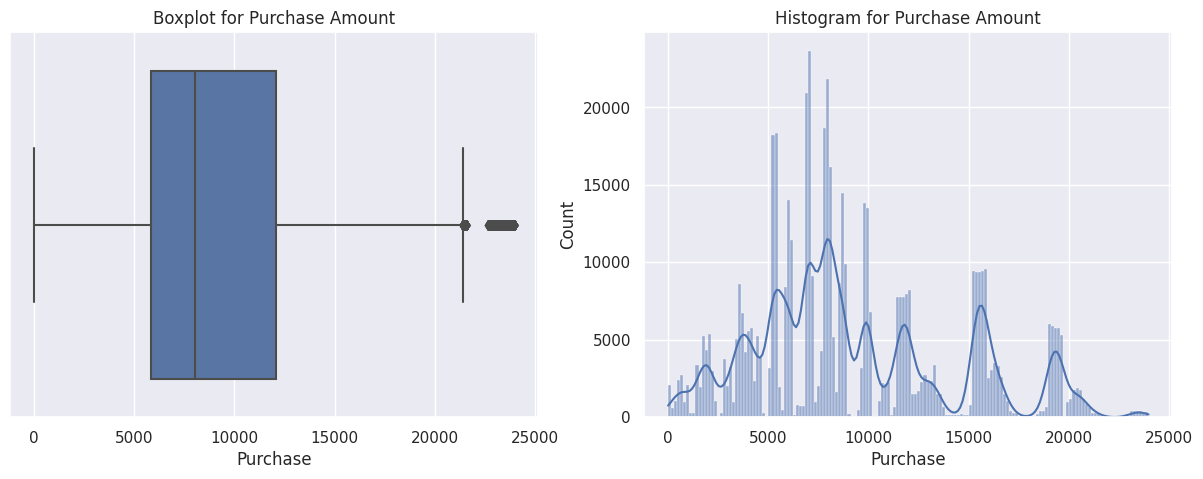

In [ ]:
# Univariate analysis for 'Purchase'
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title(f"Boxplot for Purchase Amount")
sns.boxplot(data=df, x='Purchase', orient='h')

plt.subplot(1,2,2)
plt.title(f"Histogram for Purchase Amount")
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

- The distribution of the 'Purchase' variable is right-skewed, indicating that a majority of customers made lower-value purchases, but there are some customers who made high-value purchases.

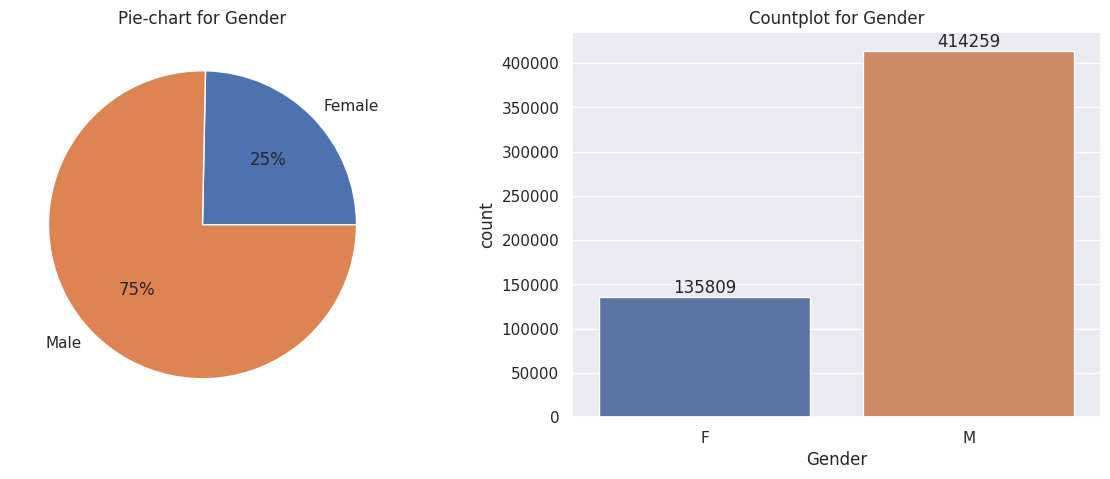

In [ ]:
# Pie-chart and Countplot for 'Gender'
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title(f"Pie-chart for Gender")
labels = ['Female','Male']
plt.pie(df.groupby('Gender')['Gender'].count(), labels = labels, autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Gender')
for i in label.containers:
    label.bar_label(i)
plt.title(f"Countplot for Gender")
plt.show()

- There are 75% Male and 75% Female.
- There are a total of 414259 Male and 135809 Female.

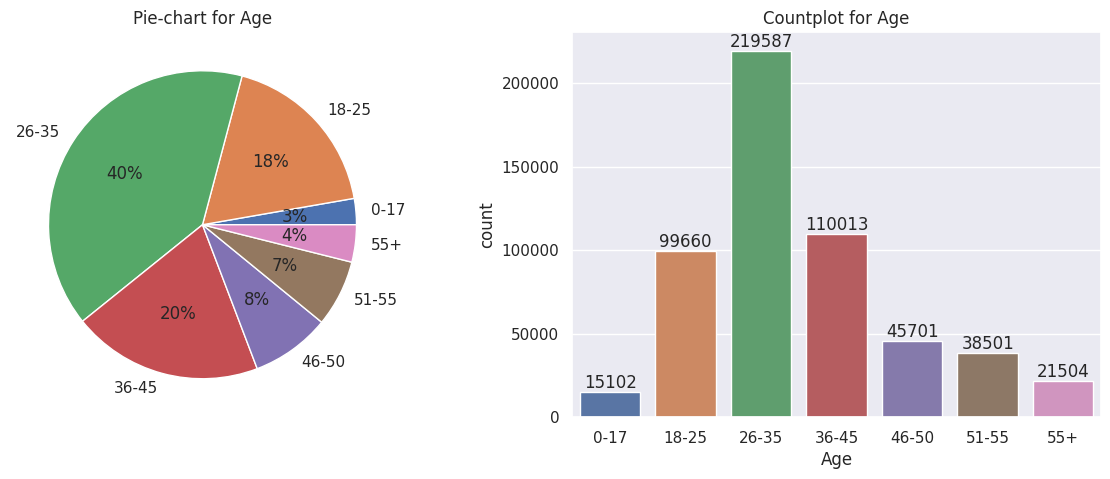

In [ ]:
# Pie-chart and Countplot for 'Age'
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title(f"Pie-chart for Age")
labels = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.pie(df.groupby('Age')['Age'].count(), labels = labels, autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Age')
for i in label.containers:
    label.bar_label(i)
plt.title(f"Countplot for Age")
plt.show()

- 40% of the customers fall under the age group of 26-35 which is the highest amongst all age groups.

- There are 219587 customers in age group 26-35 followed by 110013 customers in age group 36-45.

- Age group 0-17 and 55+ are the least frequent customers which is only 3% and 4% of the data respectively.

- There are 15102 and 21504 customers in age group 0-17 and 55+ respectively.

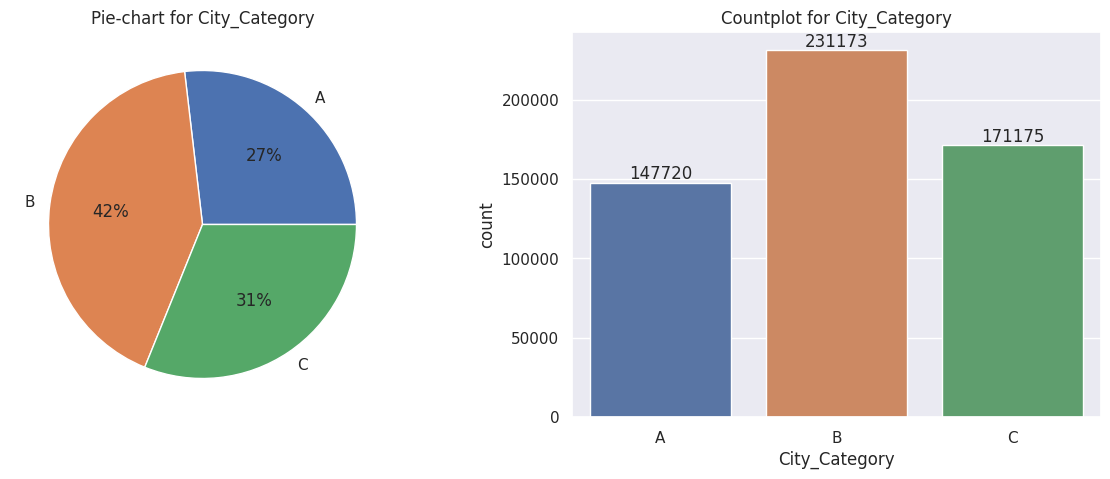

In [ ]:
# Pie-chart and Countplot for 'City_Category'
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title(f"Pie-chart for City_Category")
labels = ['A','B','C']
plt.pie(df.groupby('City_Category')['City_Category'].count(), labels = labels, autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='City_Category')
for i in label.containers:
    label.bar_label(i)
plt.title(f"Countplot for City_Category")
plt.show()

- 'B' City Category has the most customers, which is 42% or 231173 customers.

- 'A' City Category has the least customers, which is 27% or 147720 customers.

- 31% or 171175 customers are from 'C' City Category.

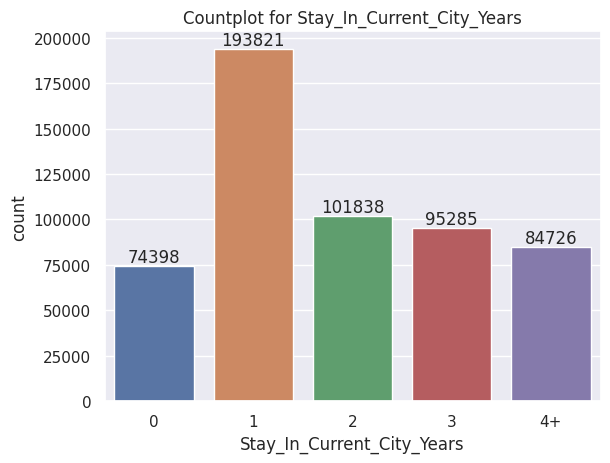

In [ ]:
# Countplot for 'Stay_In_Current_City_Years'
label = sns.countplot(data = df, x='Stay_In_Current_City_Years')
for i in label.containers:
    label.bar_label(i)
plt.title(f"Countplot for Stay_In_Current_City_Years")
plt.show()

- Most people are staying in the current city since 1 year, and the least people are staying for less than 1 year (0).

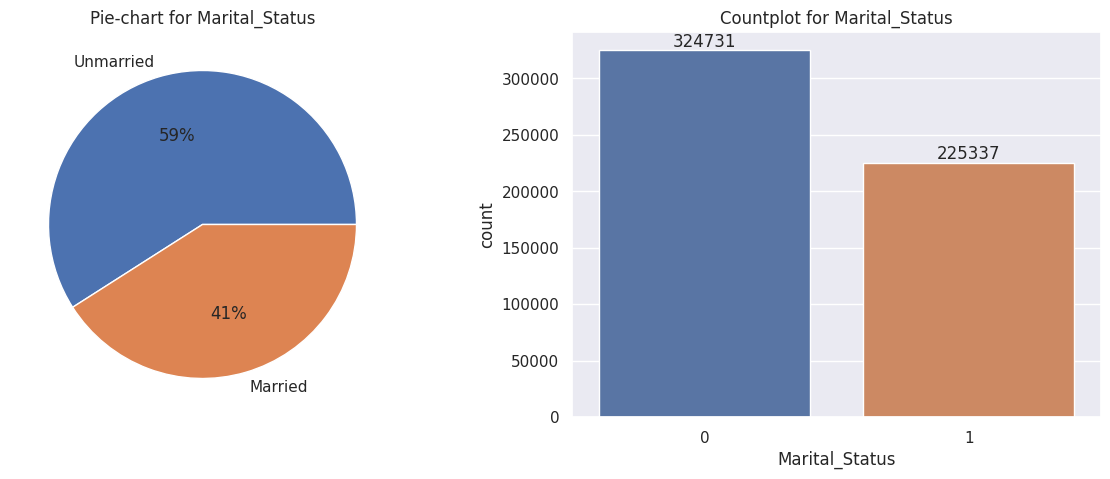

In [ ]:
# Pie-chart and Countplot for 'Marital_Status'
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title(f"Pie-chart for Marital_Status")
labels = [0, 1]
plt.pie(df.groupby('Marital_Status')['Marital_Status'].count(), labels = ['Unmarried', 'Married'], autopct = '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data = df, x='Marital_Status')
for i in label.containers:
    label.bar_label(i)
plt.title(f"Countplot for Marital_Status")
plt.show()

- Most customers are Unmarried, i.e. 59%, Married customers are 41%.

- There are 324731 unmarried customers and 225337 married customers.

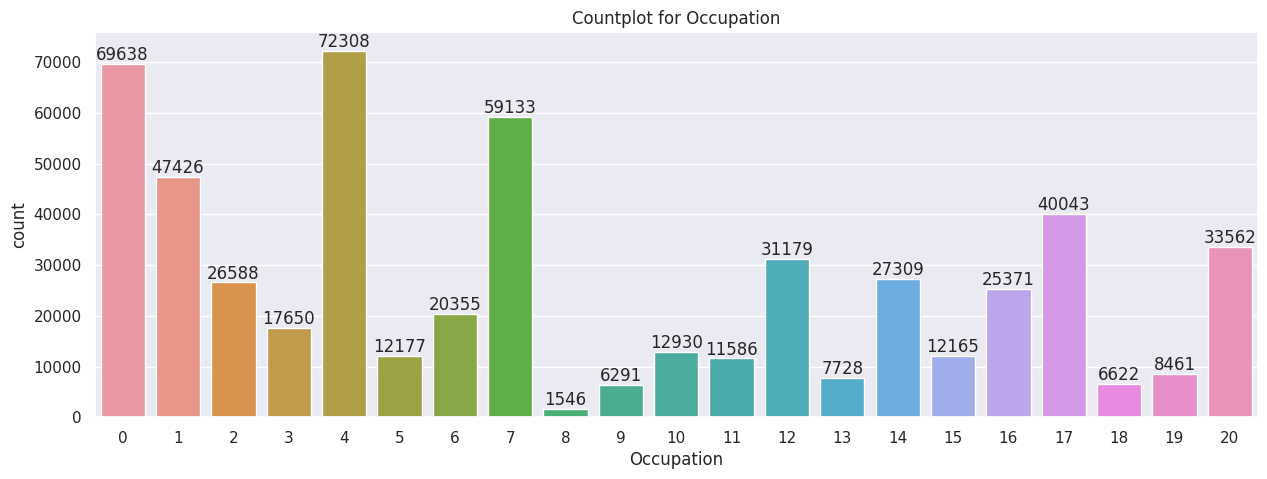

In [ ]:
# Countplot for 'Occupation'
plt.figure(figsize=(15, 5))
label = sns.countplot(data = df, x='Occupation')
for i in label.containers:
    label.bar_label(i)
plt.title(f"Countplot for Occupation")
plt.show()

- People having occupation 4 are the most frequent buyers followed by occupation 0 and 7.

- People having occupation 8 are the least frequent buyers followed by occupation 9 and 18.

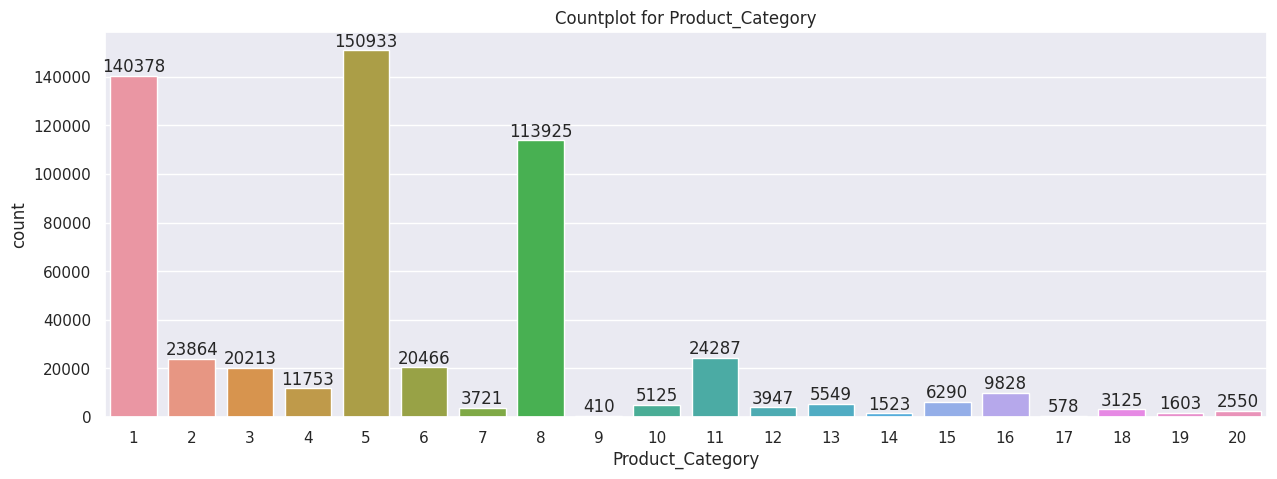

In [ ]:
# Countplot for 'Product_Category'
plt.figure(figsize=(15, 5))
label = sns.countplot(data = df, x='Product_Category')
for i in label.containers:
    label.bar_label(i)
plt.title(f"Countplot for Product_Category")
plt.show()

- The most frequent bought product category is 5 followed by 1 and 8.

- The least frequent bought product category is 9 followed by 17 and 14.

### Bi-variate Analysis

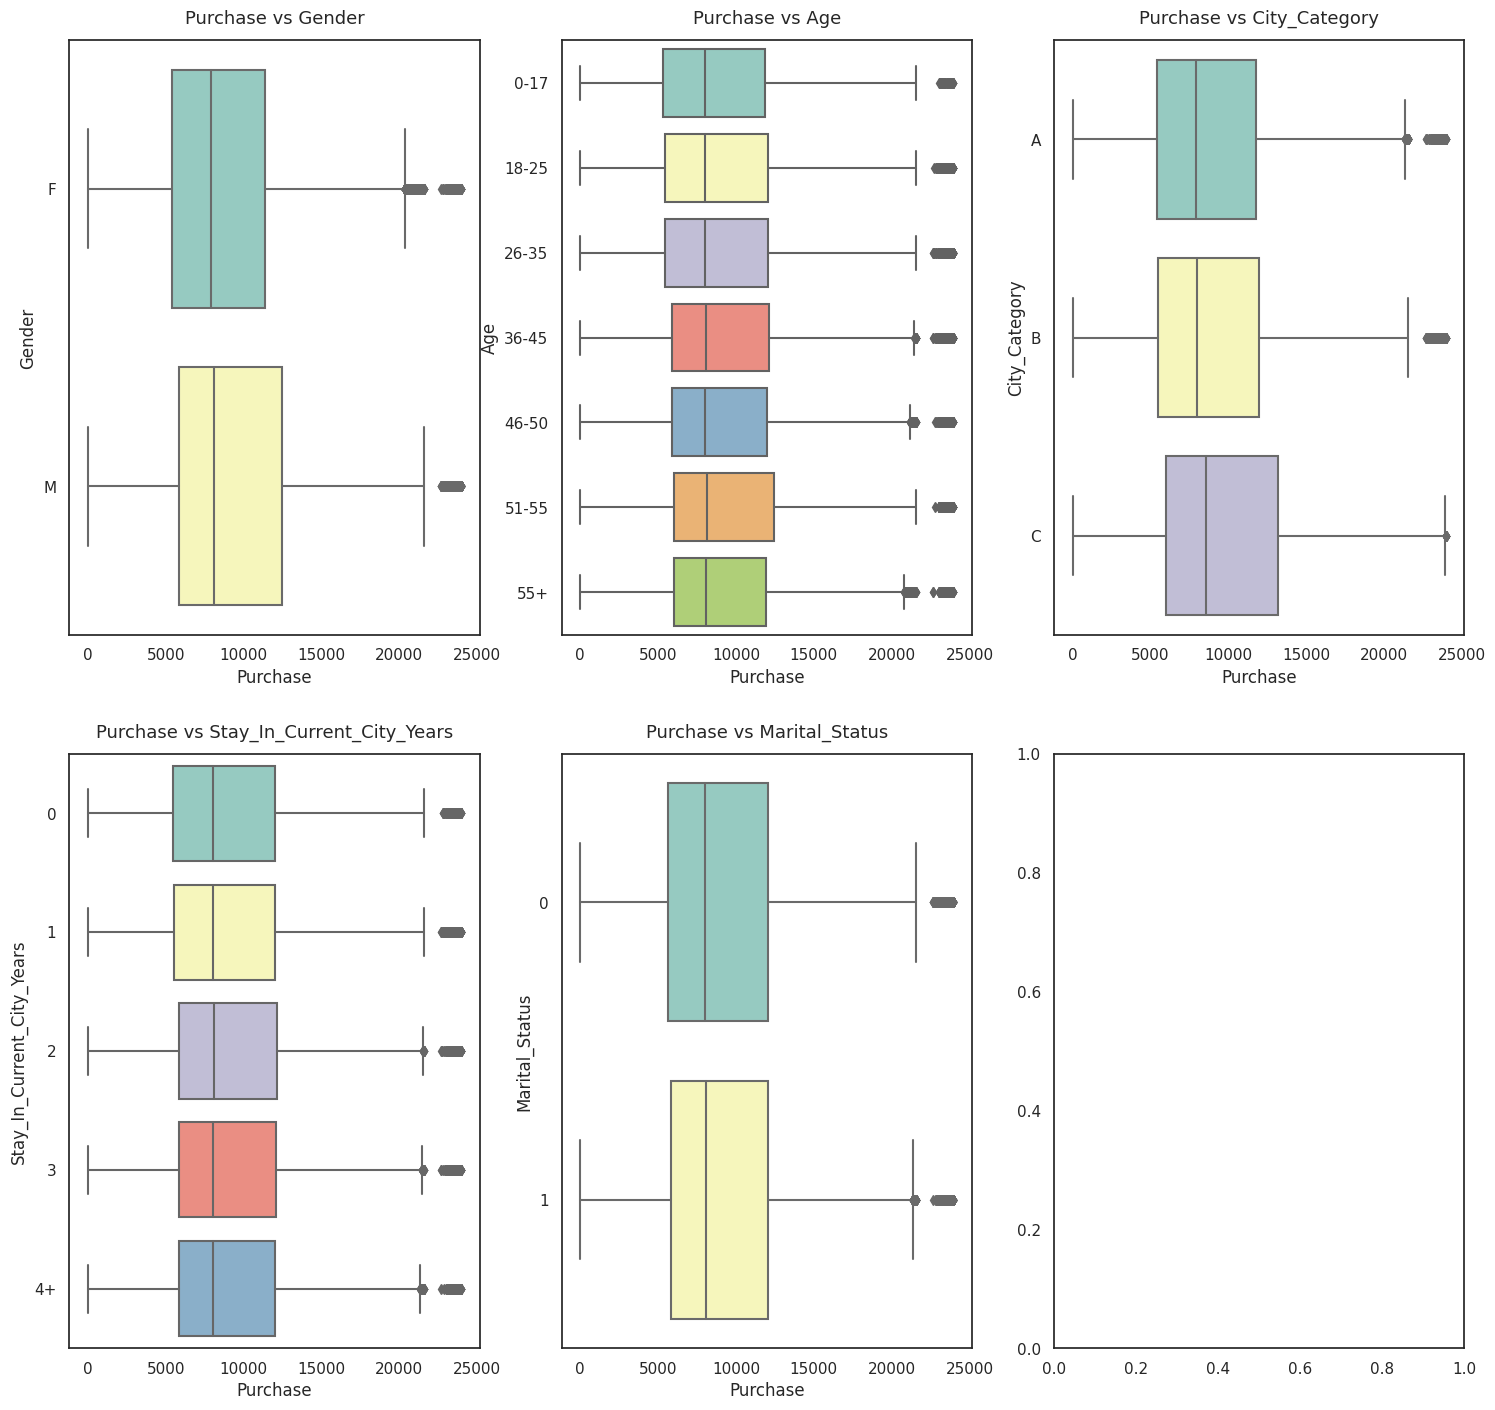

In [ ]:
attributes = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
sns.set_style("white")
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        if i==1 and j==2:
            continue
        sns.boxplot(data=df, x='Purchase', y=attributes[count], ax=axis[i,j], palette='Set3')
        axis[i,j].set_title(f"Purchase vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [ ]:
df.groupby(['Age'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

In [ ]:
df.groupby(['City_Category'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
City_Category                                                             
A              147720.0  8911.939216  4892.115238  12.0  5403.0  7931.0   
B              231173.0  9151.300563  4955.496566  12.0  5460.0  8005.0   
C              171175.0  9719.920993  5189.465121  12.0  6031.5  8585.0   

                   75%      max  
City_Category                    
A              11786.0  23961.0  
B              11986.0  23960.0  
C              13197.0  23961.0

In [ ]:
df.groupby(['Stay_In_Current_City_Years'])['Purchase'].describe()

count         mean          std   min     25%  \
Stay_In_Current_City_Years                                                     
0                            74398.0  9180.075123  4990.479940  12.0  5480.0   
1                           193821.0  9250.145923  5027.476933  12.0  5500.0   
2                           101838.0  9320.429810  5044.588224  12.0  5846.0   
3                            95285.0  9286.904119  5020.343541  12.0  5832.0   
4+                           84726.0  9275.598872  5017.627594  12.0  5844.0   

                               50%      75%      max  
Stay_In_Current_City_Years                            
0                           8025.0  11990.0  23960.0  
1                           8041.0  12042.0  23961.0  
2                           8072.0  12117.0  23961.0  
3                           8047.0  12075.0  23961.0  
4+                          8052.0  12038.0  23958.0

In [ ]:
df.groupby(['Marital_Status'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
0               324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
1               225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
0               12061.0  23961.0  
1               12042.0  23961.0

**Observations:**

- Males spend more than Females. The average purchase amount for a male is 9437, while for a female it is 8734.

- There is not much difference in the median purchase values for different age groups. Age group 51-55 has the highest average purchase amount which is around 9534, while age group 0-17 has the least average purchase amount which is around 8933.

 The highest purchase amount is around 23960 for all the groups, while the least purchase amount is 12 for all the groups.

- The mean as well as median purchase amount is the highest for city category C followed by B and A.

- For people staying in current city, the mean as well as median purchase amount is almost same for all years. The highest purchase amount is also the same for all the years.

- The minimum, maximum, mean as well as median purchase amount is all almost same for both marital status customers.

### Multivariate Analysis

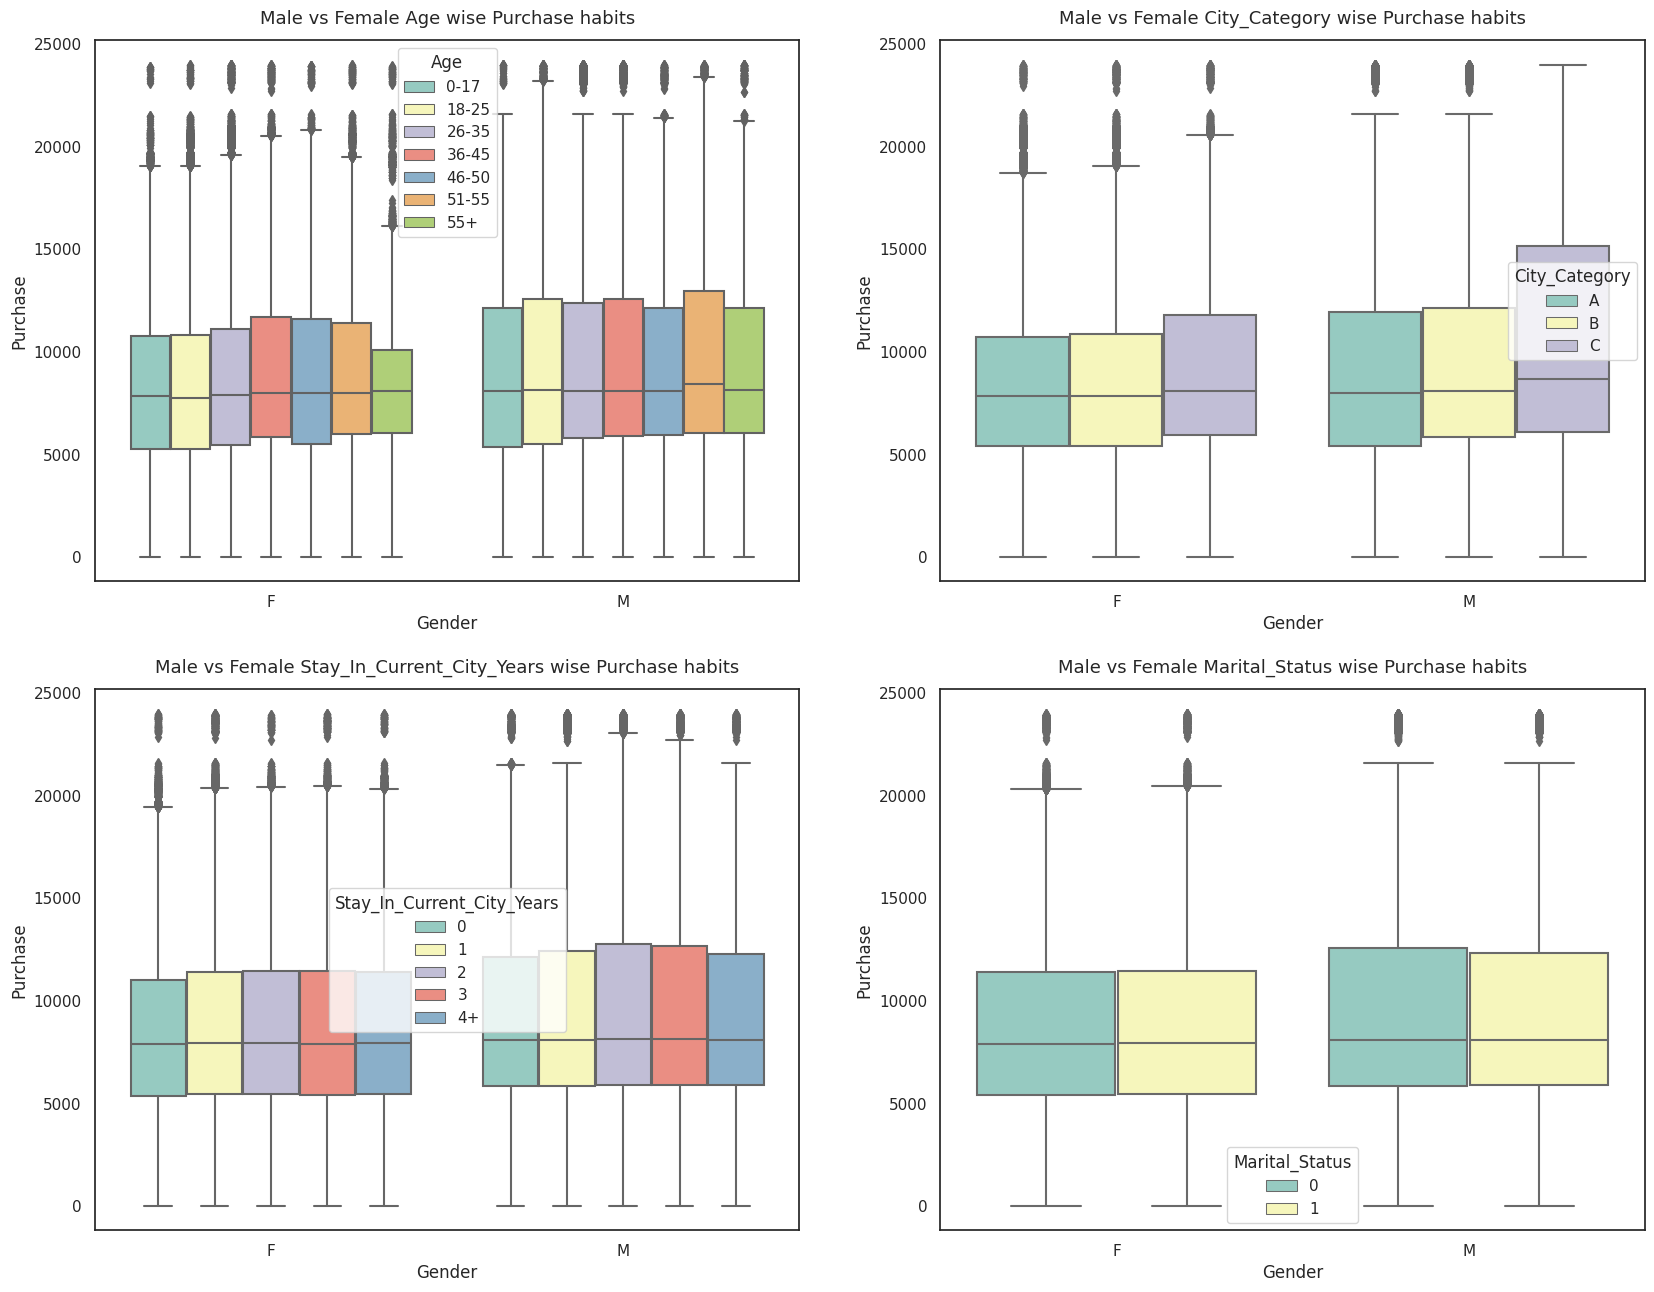

In [ ]:
attributes = ['Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
sns.set_style("white")
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df, y='Purchase', x='Gender', hue=attributes[count], ax=axis[i,j], palette='Set3')
        axis[i,j].set_title(f"Male vs Female {attributes[count]} wise Purchase habits", pad=12, fontsize=13)
        count += 1

**Observations:**

- The median purchase amount for 18-25 age females is the lowest and almost same for the rest, while the median purchase amount for 51-55 age males is the highest and almost same for the rest.

- The median purchase amount for both females and males in city category C is the highest compared to city A and B.

- The median purchase amount is a little lower for females staying for 3 and 0 years as compared to others, while there is not much difference for males.

- There is no effect of marital status on the spending habits of both the genders. While we can observe that the median purchase amount for Males is higher comapred to Females.

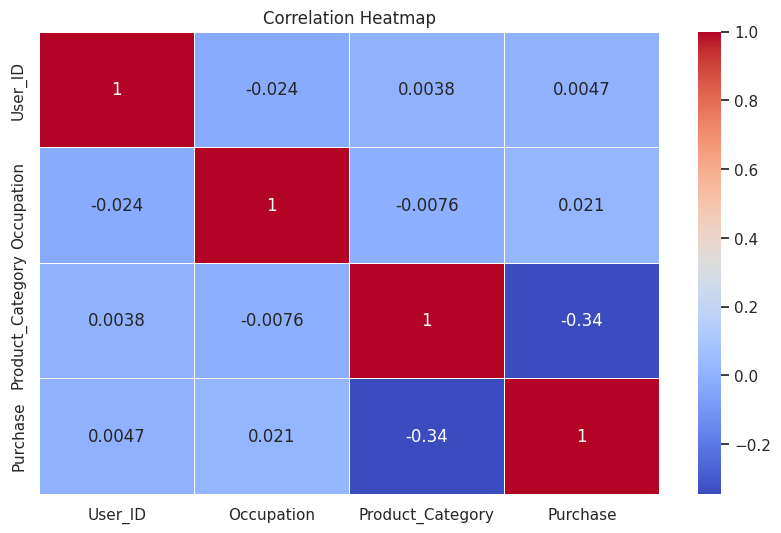

In [ ]:
# Correlation heatmap for continuous variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Observations:**

- High Negative Correlation (-0.0076) between Product_Category and Occupation.

- Slight Positive Correlation (0.021) between Purchase and Occupation.

- Negative Correlation (-0.34) between Product_Category and Purchase.

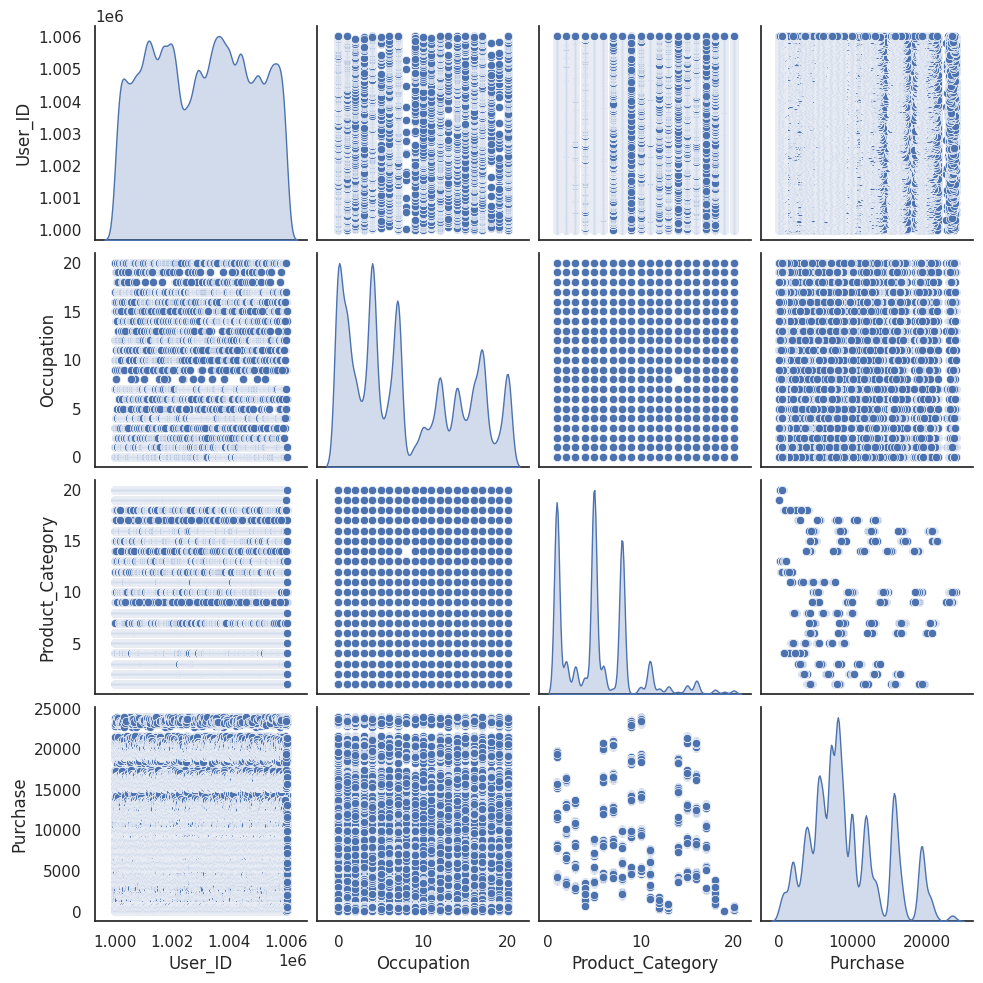

In [ ]:
# Pairplot for continuous variables
sns.pairplot(df, diag_kind='kde')
plt.show()

### Missing Value & Outlier Detection

In [ ]:
# Detect Null values
print("Null values:")
print(df.isnull().sum())

Null values:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


- There are no null values present in the dataset.

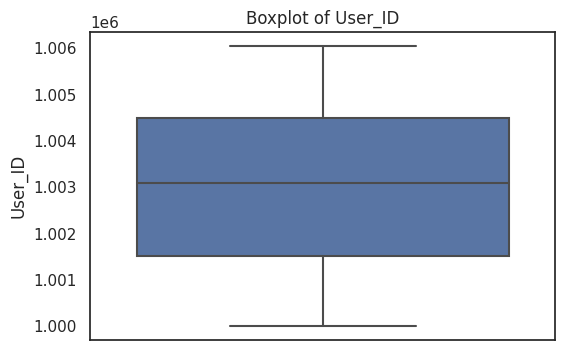

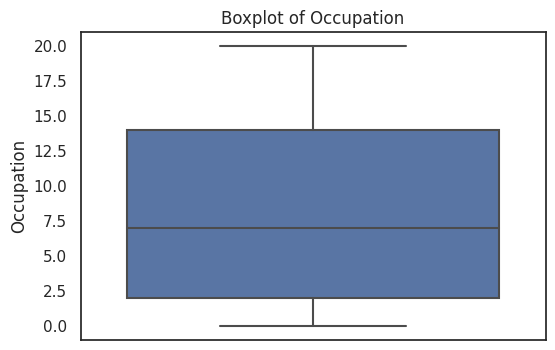

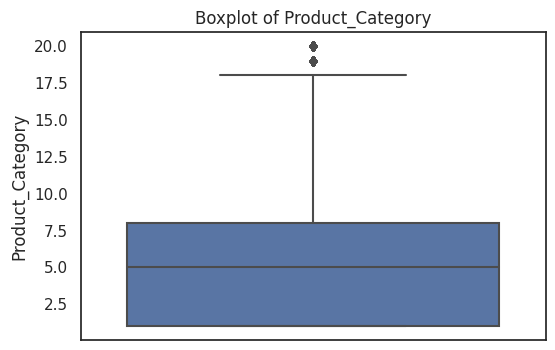

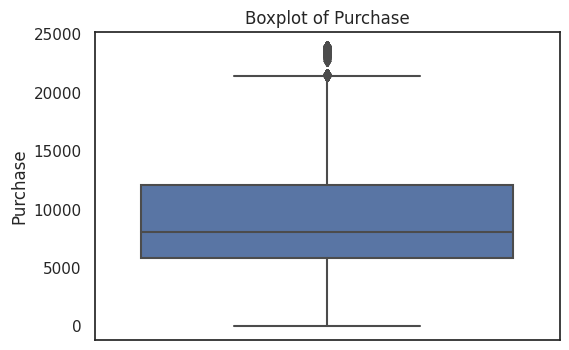

In [ ]:
# Outlier detection using boxplot and describe method
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

- There are a few outliers in Product_Category, and many in Purchase.

In [ ]:
# Additional check for outliers using describe method (difference between mean and median)
for col in df.select_dtypes(include='number').columns:
    median = df[col].median()
    mean = df[col].mean()
    diff = mean - median
    print(f"Column: {col}, Median: {median}, Mean: {mean}, Difference: {diff}")

Column: User_ID, Median: 1003077.0, Mean: 1003028.8424013031, Difference: -48.157598696881905
Column: Occupation, Median: 7.0, Mean: 8.076706879876669, Difference: 1.076706879876669
Column: Product_Category, Median: 5.0, Mean: 5.404270017525106, Difference: 0.40427001752510616
Column: Purchase, Median: 8047.0, Mean: 9263.968712959126, Difference: 1216.9687129591257


### Are women spending more money per transaction than men? Why or Why not?

In [ ]:
# Calculate the average spending for female and male customers
average_female_spending = df[df['Gender'] == 'F']['Purchase'].mean()
average_male_spending = df[df['Gender'] == 'M']['Purchase'].mean()

print("Average spending for female customers:", average_female_spending)
print("Average spending for male customers:", average_male_spending)

Average spending for female customers: 8734.565765155476
Average spending for male customers: 9437.526040472265


<Figure size 1500x500 with 0 Axes>

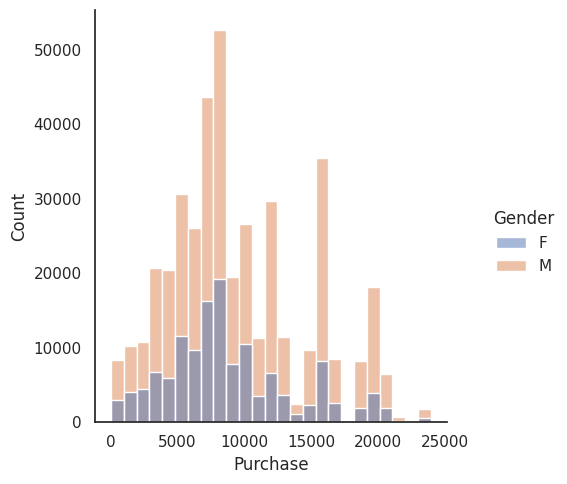

In [ ]:
plt.figure(figsize=(15,5))
sns.displot(x= 'Purchase',data=df,hue='Gender',bins=25)
plt.show()

In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

Men are spending more money per transaction as compared to women, as the average spending for women is approx 8735, while the average spending for men is 9438.

### Confidence intervals and distribution of the mean of the expenses by female and male customers

In [ ]:
df_female = df[df['Gender']=='F']
df_male = df[df['Gender']=='M']

In [ ]:
# Central Limit Theorem
def bootstrap(sample1,sample2,sample_size,itr_size=1000,ci=90):
    ci = ci/100

    plt.figure(figsize=(15,5))
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

    # For Sample1's means
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

    # For Sample2's means
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(ci + (1-ci)/2) * sigma2 + mean2

    sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
    label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

    sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
    label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)

    plt.title(f"Sample Size: {sample_size}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)}, Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}")
    plt.legend(loc = 'upper right')
    plt.xlabel('Purchase')
    plt.ylabel('Density')


    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

### Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

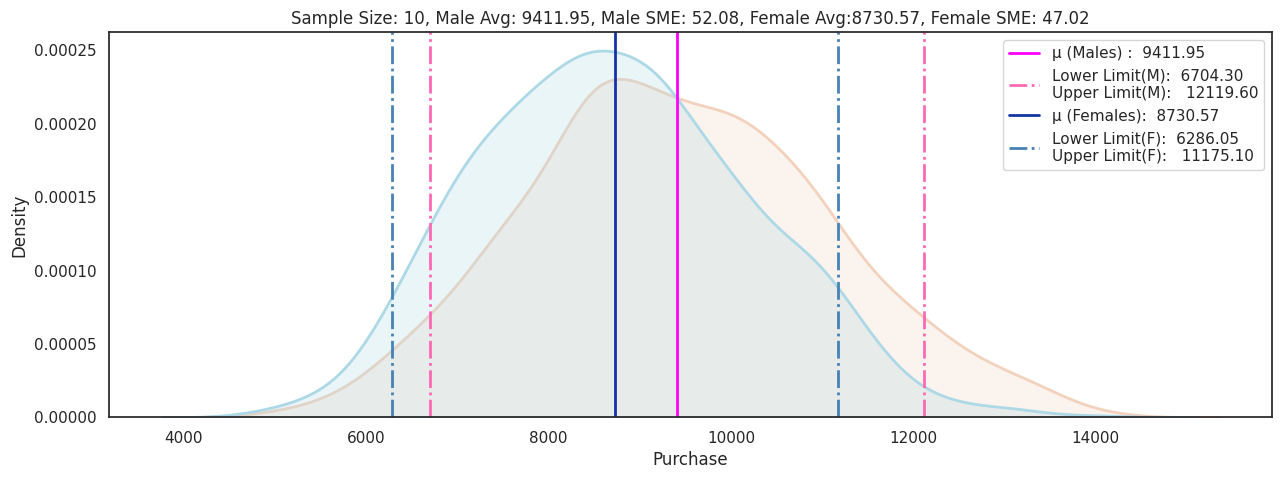

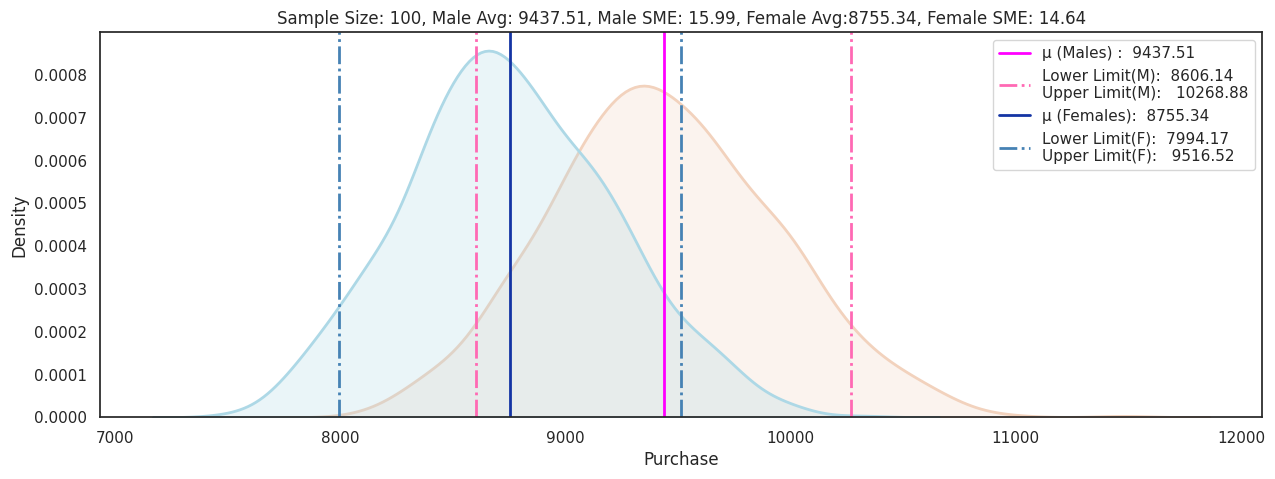

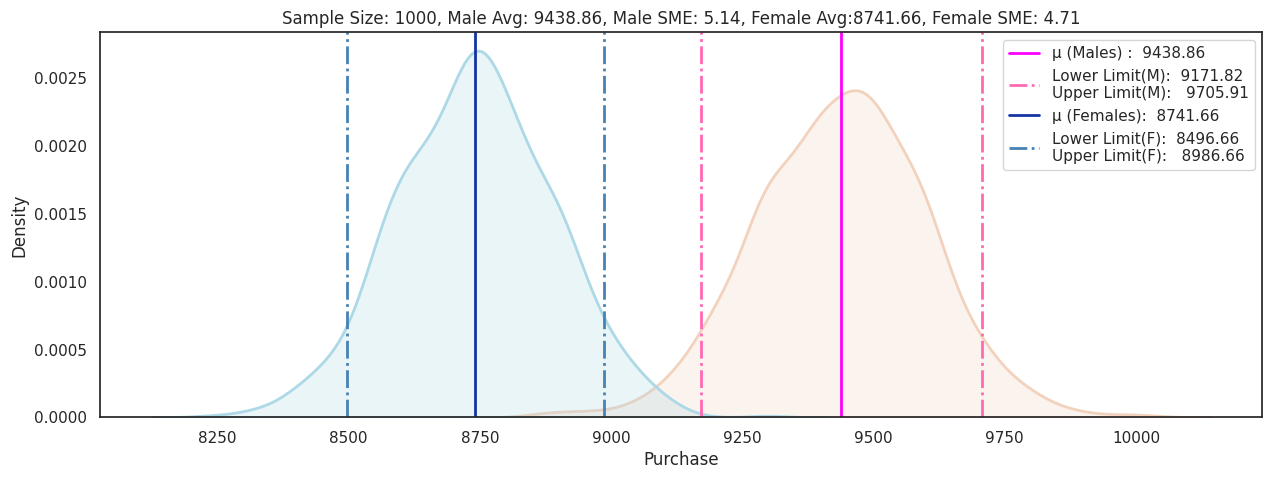

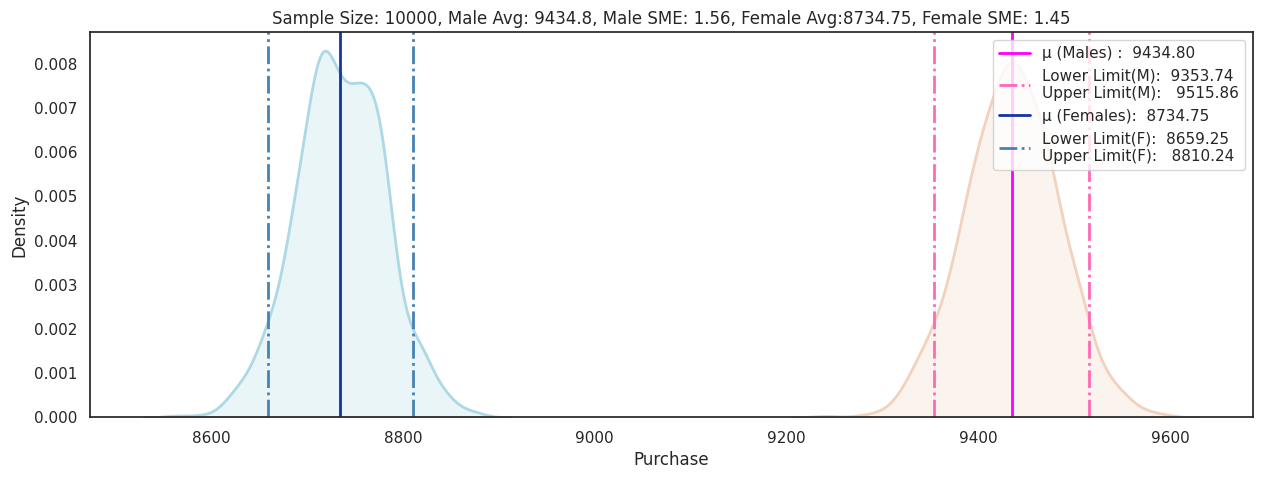

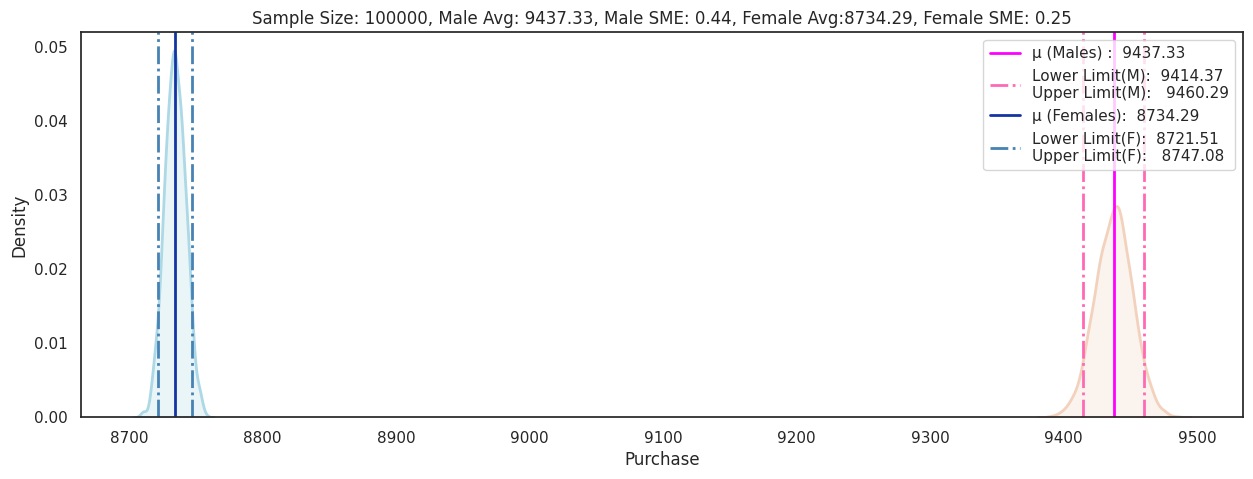

In [ ]:
# Mean of 1000 random samples of sizes 10,100,1000,10000 and 100000 with 90% Confidence Interval
sample_sizes = [10,100,1000,10000,100000]
ci = 90
itr_size = 1000

res = pd.DataFrame(columns = ['Gender','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrap(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)

    res = res.append({'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    res = res.append({'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}, ignore_index = True)

**Observations:**

- As the sample size increases, the distribution for both Male and Female change significantly. Both the plots start to seperate and become distinct.

- For Sample size 10, the confidence interval for both Male and Female is overlapping.

- For Sample size 100, the confidence interval for both Male and Female is still overlapping.

- For Sample size 1000, the confidence interval for both Male and Female is overlapping a little.

- For Sample size 10000, the confidence interval for both Male and Female is now not overlapping.

- For Sample size 100000, the confidence interval for both Male and Female is far distant.

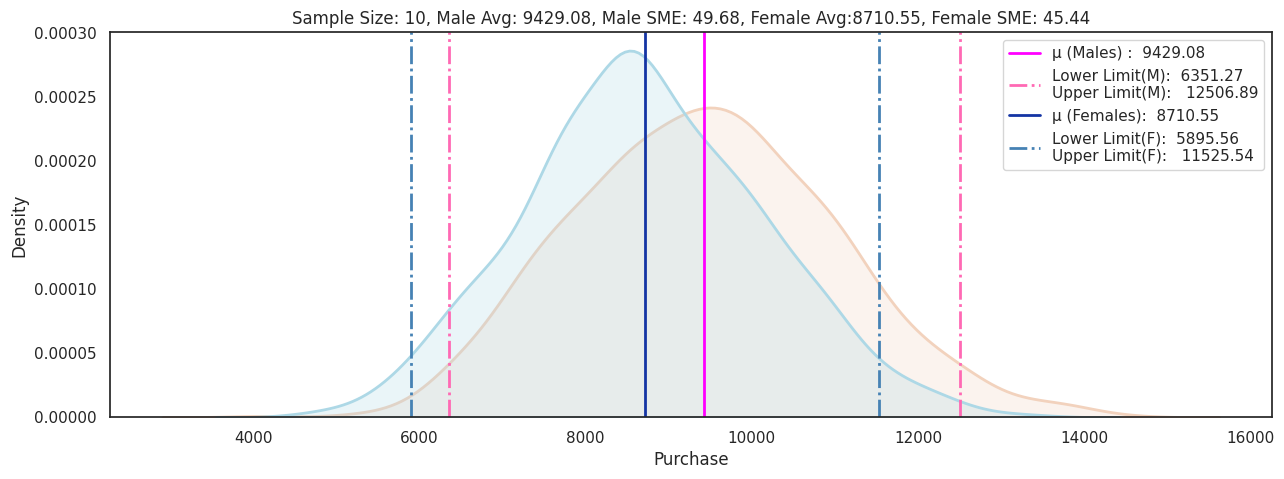

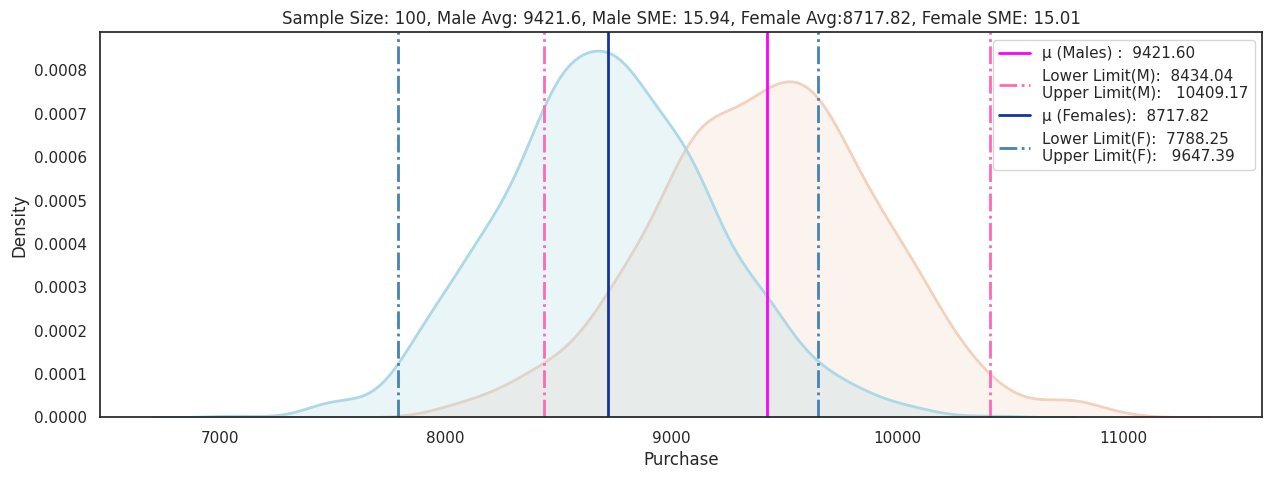

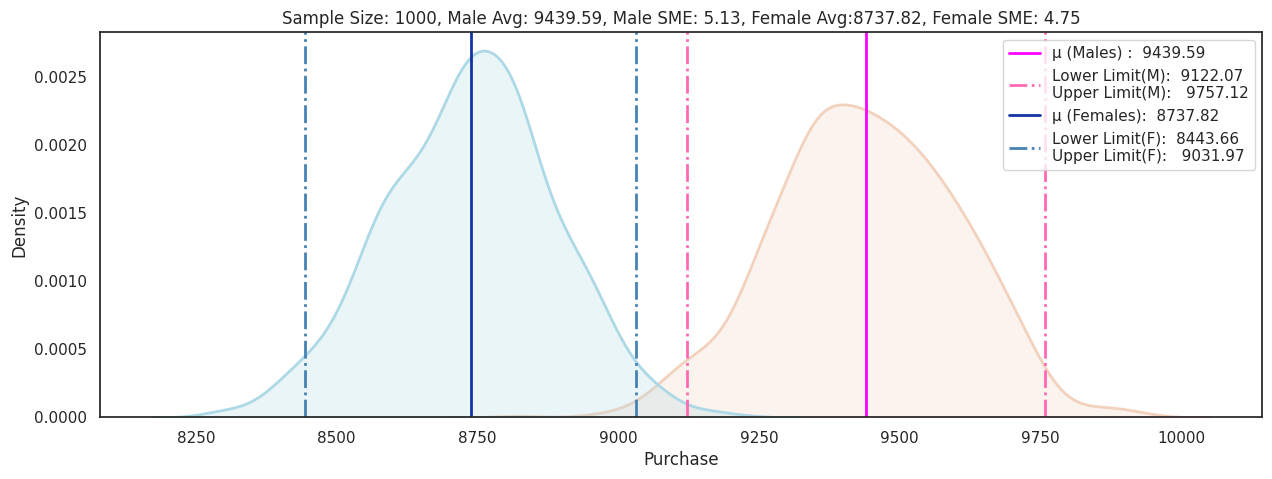

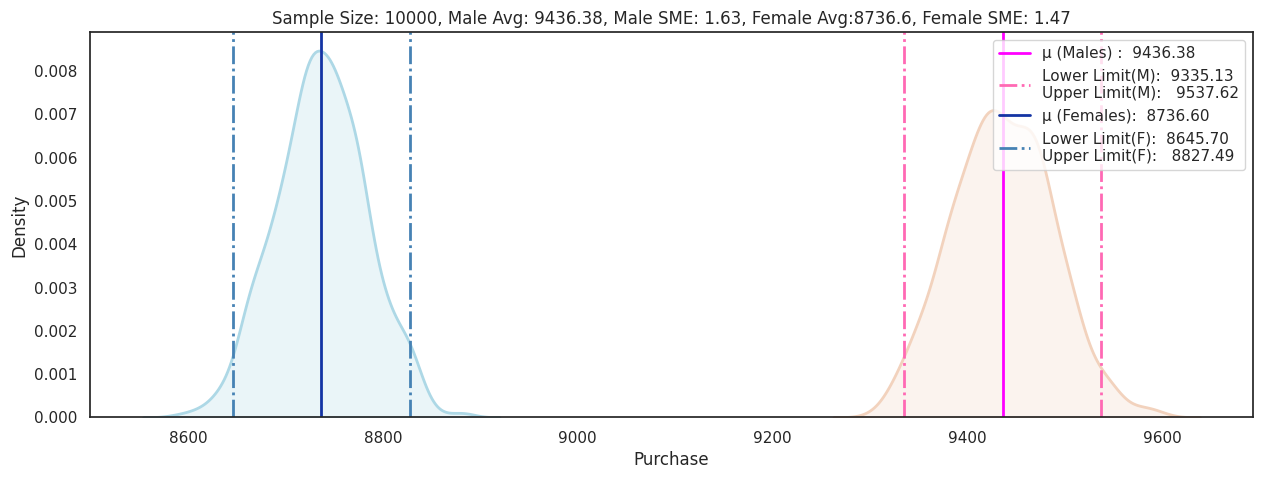

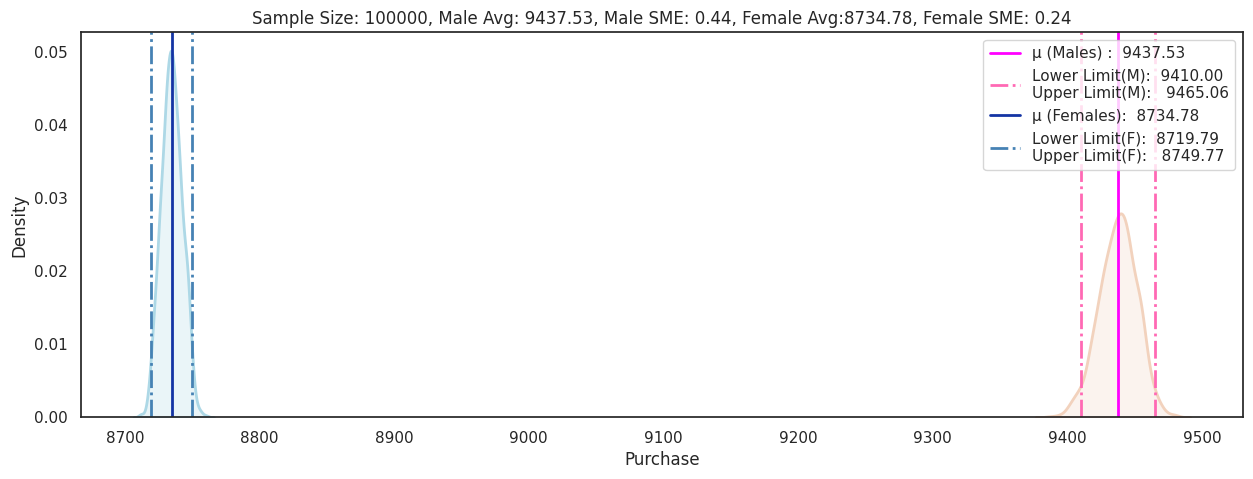

In [ ]:
# Mean of 1000 random samples of sizes 10,100,1000,10000 and 100000 with 95% Confidence Interval
sample_sizes = [10,100,1000,10000,100000]
ci = 95
itr_size = 1000

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrap(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)

    res = res.append({'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    res = res.append({'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}, ignore_index = True)

**Observations:**

- As the sample size increases, the distribution for both Male and Female change significantly. Both the plots start to seperate and become distinct.

- For Sample size 10, the confidence interval for both Male and Female is overlapping.

- For Sample size 100, the confidence interval for both Male and Female is still overlapping.

- For Sample size 1000, the confidence interval for both Male and Female is overlapping a little.

- For Sample size 10000, the confidence interval for both Male and Female is now not overlapping.

- For Sample size 100000, the confidence interval for both Male and Female is far distant.

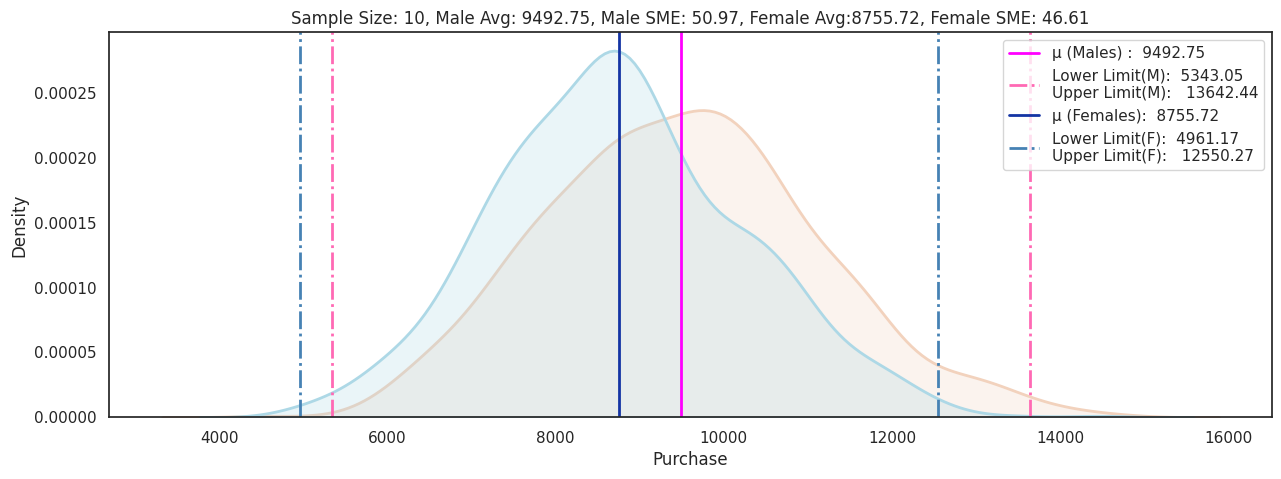

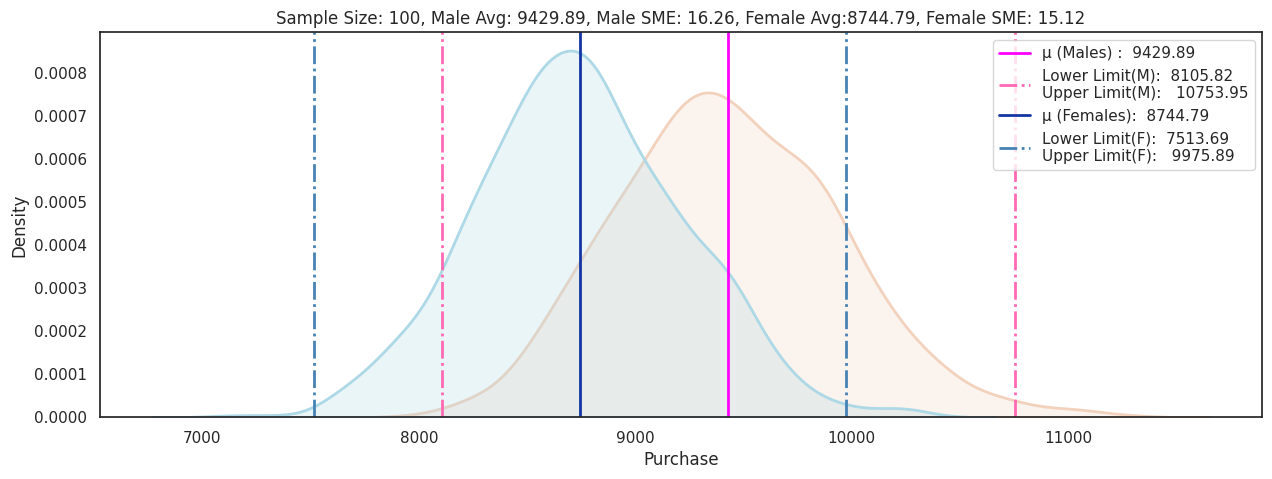

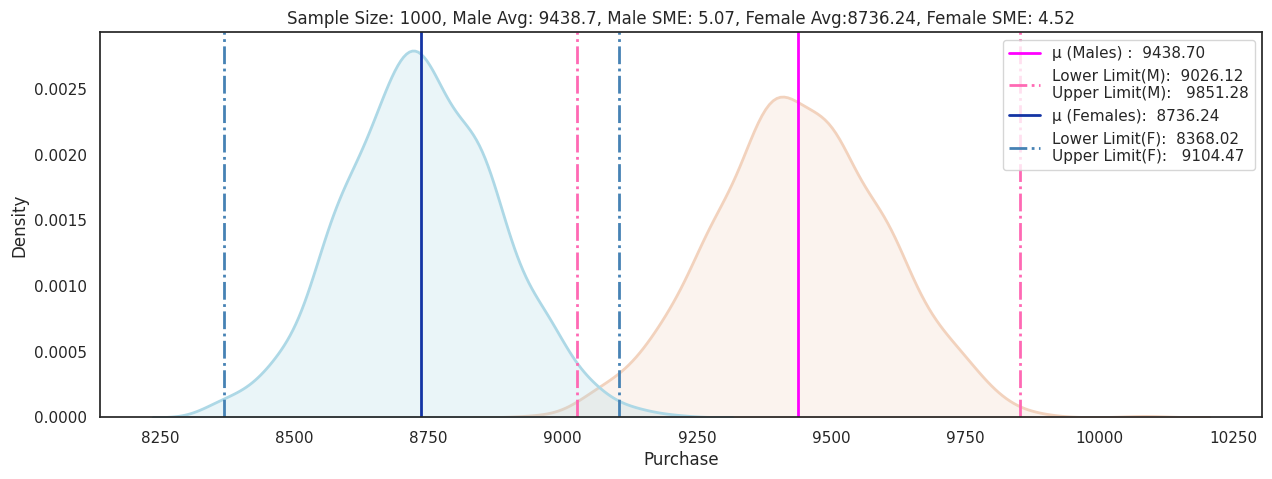

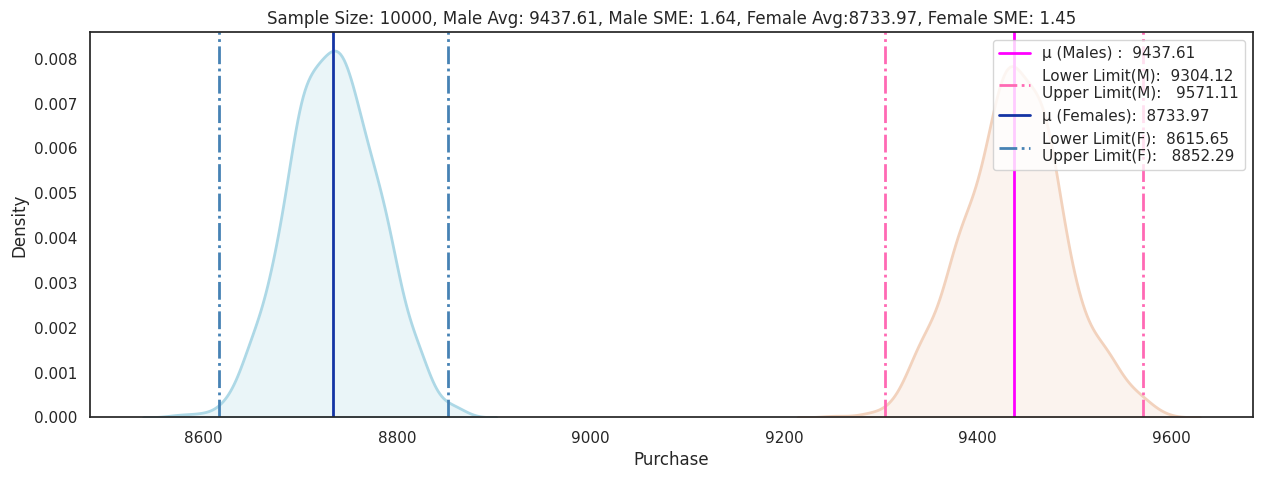

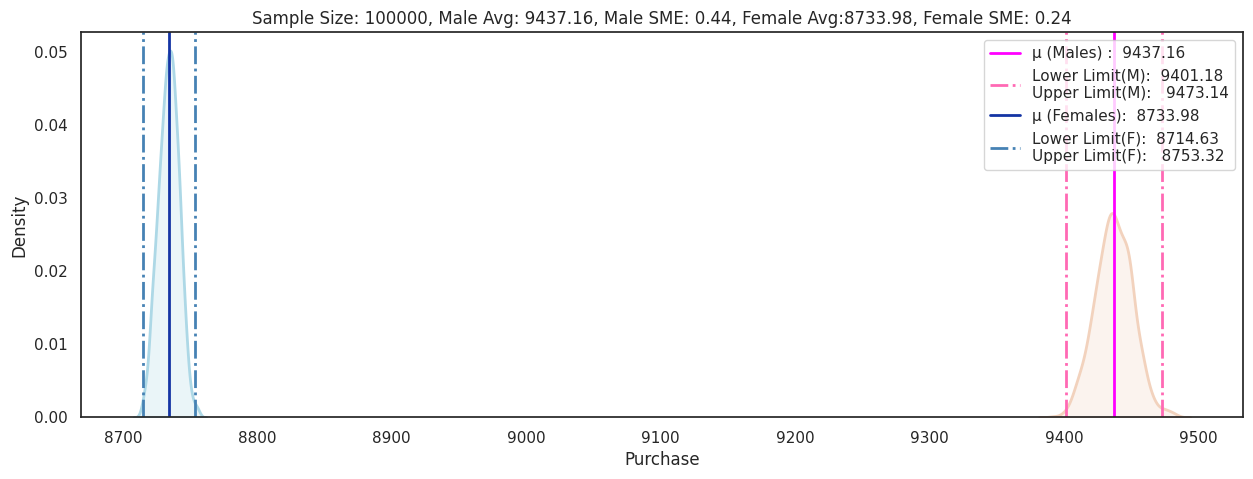

In [ ]:
# Mean of 1000 random samples of sizes 10,100,1000,10000 and 100000 with 99% Confidence Interval
sample_sizes = [10,100,1000,10000,100000]
ci = 99
itr_size = 1000

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrap(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)

    res = res.append({'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    res = res.append({'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}, ignore_index = True)

**Observations:**

- As the sample size increases, the distribution for both Male and Female change significantly. Both the plots start to seperate and become distinct.

- For Sample size 10, the confidence interval for both Male and Female is overlapping.

- For Sample size 100, the confidence interval for both Male and Female is still overlapping.

- For Sample size 1000, the confidence interval for both Male and Female is overlapping a little.

- For Sample size 10000, the confidence interval for both Male and Female is now not overlapping.

- For Sample size 100000, the confidence interval for both Male and Female is far distant.

In [ ]:
res

Gender Sample Size  Lower Limit  Upper Limit  Sample Mean  \
0       M          10      6704.30     12119.60      9411.95   
1       F          10      6286.05     11175.10      8730.57   
2       M         100      8606.14     10268.88      9437.51   
3       F         100      7994.17      9516.52      8755.34   
4       M        1000      9171.82      9705.91      9438.86   
5       F        1000      8496.66      8986.66      8741.66   
6       M       10000      9353.74      9515.86      9434.80   
7       F       10000      8659.25      8810.24      8734.75   
8       M      100000      9414.37      9460.29      9437.33   
9       F      100000      8721.51      8747.08      8734.29   
10      M          10      6351.27     12506.89      9429.08   
11      F          10      5895.56     11525.54      8710.55   
12      M         100      8434.04     10409.17      9421.60   
13      F         100      7788.25      9647.39      8717.82   
14      M        1000      9122.07      9757.12      9439.59   
15      F        1000      8443.66      9031.97      8737.82   
16      M       10000      9335.13      9537.62      9436.38   
17      F       10000      8645.70      8827.49      8736.60   
18      M      100000      9410.00      9465.06      9437.53   
19      F      100000      8719.79      8749.77      8734.78   
20      M          10      5343.05     13642.44      9492.75   
21      F          10      4961.17     12550.27      8755.72   
22      M         100      8105.82     10753.95      9429.89   
23      F         100      7513.69      9975.89      8744.79   
24      M        1000      9026.12      9851.28      9438.70   
25      F        1000      8368.02      9104.47      8736.24   
26      M       10000      9304.12      9571.11      9437.61   
27      F       10000      8615.65      8852.29      8733.97   
28      M      100000      9401.18      9473.14      9437.16   
29      F      100000      8714.63      8753.32      8733.98   

   Confidence Interval       Interval Range    Range  
0                   90    [6704.3, 12119.6]  5415.30  
1                   90   [6286.05, 11175.1]  4889.05  
2                   90  [8606.14, 10268.88]  1662.74  
3                   90   [7994.17, 9516.52]  1522.35  
4                   90   [9171.82, 9705.91]   534.09  
5                   90   [8496.66, 8986.66]   490.00  
6                   90   [9353.74, 9515.86]   162.12  
7                   90   [8659.25, 8810.24]   150.99  
8                   90   [9414.37, 9460.29]    45.92  
9                   90   [8721.51, 8747.08]    25.57  
10                  95  [6351.27, 12506.89]  6155.62  
11                  95  [5895.56, 11525.54]  5629.98  
12                  95  [8434.04, 10409.17]  1975.13  
13                  95   [7788.25, 9647.39]  1859.14  
14                  95   [9122.07, 9757.12]   635.05  
15                  95   [8443.66, 9031.97]   588.31  
16                  95   [9335.13, 9537.62]   202.49  
17                  95    [8645.7, 8827.49]   181.79  
18                  95    [9410.0, 9465.06]    55.06  
19                  95   [8719.79, 8749.77]    29.98  
20                  99  [5343.05, 13642.44]  8299.39  
21                  99  [4961.17, 12550.27]  7589.10  
22                  99  [8105.82, 10753.95]  2648.13  
23                  99   [7513.69, 9975.89]  2462.20  
24                  99   [9026.12, 9851.28]   825.16  
25                  99   [8368.02, 9104.47]   736.45  
26                  99   [9304.12, 9571.11]   266.99  
27                  99   [8615.65, 8852.29]   236.64  
28                  99   [9401.18, 9473.14]    71.96  
29                  99   [8714.63, 8753.32]    38.69

### Results when the same activity is performed for Married vs Unmarried

#### Are married customers spending more money per transaction than unmarried customers? Why or Why not?

In [ ]:
# Calculate the average spending for married and unmarried customers
average_married_spending = df[df['Marital_Status'] == 'Married']['Purchase'].mean()
average_unmarried_spending = df[df['Marital_Status'] == 'Unmarried']['Purchase'].mean()

print("Average spending for married customers:", average_married_spending)
print("Average spending for unmarried customers:", average_unmarried_spending)

Average spending for married customers: nan
Average spending for unmarried customers: nan


<Figure size 1500x500 with 0 Axes>

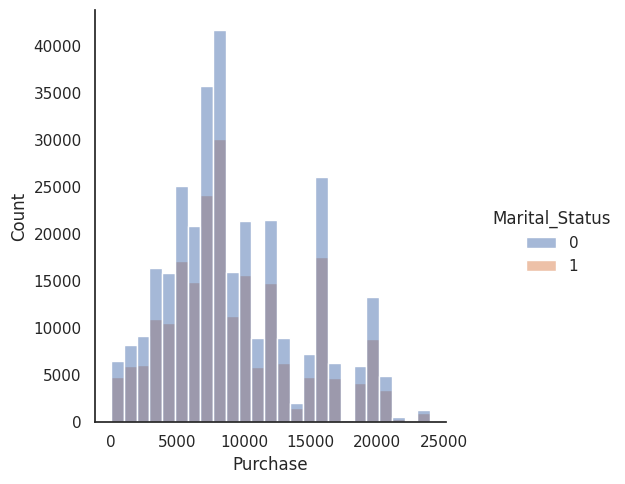

In [ ]:
plt.figure(figsize=(15,5))
sns.displot(x= 'Purchase',data=df,hue='Marital_Status',bins=25)
plt.show()

In [ ]:
df.groupby(['Marital_Status'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
0               324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
1               225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
0               12061.0  23961.0  
1               12042.0  23961.0

There is a very little difference between mean and median purchase amounts for married and unmarried customers.

#### Confidence intervals and distribution of the mean of the expenses by married and unmarried customers

In [ ]:
df_married = df[df['Marital_Status'] == 0]
df_unmarried = df[df['Marital_Status'] == 1]

In [ ]:
# Central Limit Theorem
def bootstrap_marital_status(sample1,sample2,sample_size,itr_size=1000,ci=90):
    ci = ci/100

    plt.figure(figsize=(15,5))
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

    # For Sample1's means
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

    # For Sample2's means
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(ci + (1-ci)/2) * sigma2 + mean2

    sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
    label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

    sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
    label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)

    plt.title(f"Sample Size: {sample_size}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)}, Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}")
    plt.legend(loc = 'upper right')
    plt.xlabel('Purchase')
    plt.ylabel('Density')


    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

#### Are confidence intervals of average married and unmarried spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

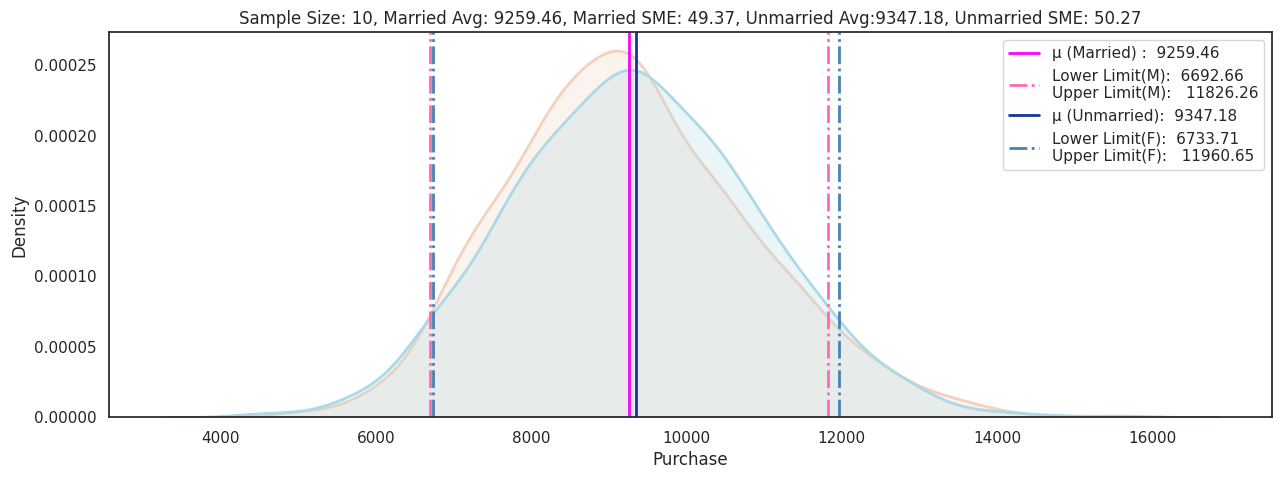

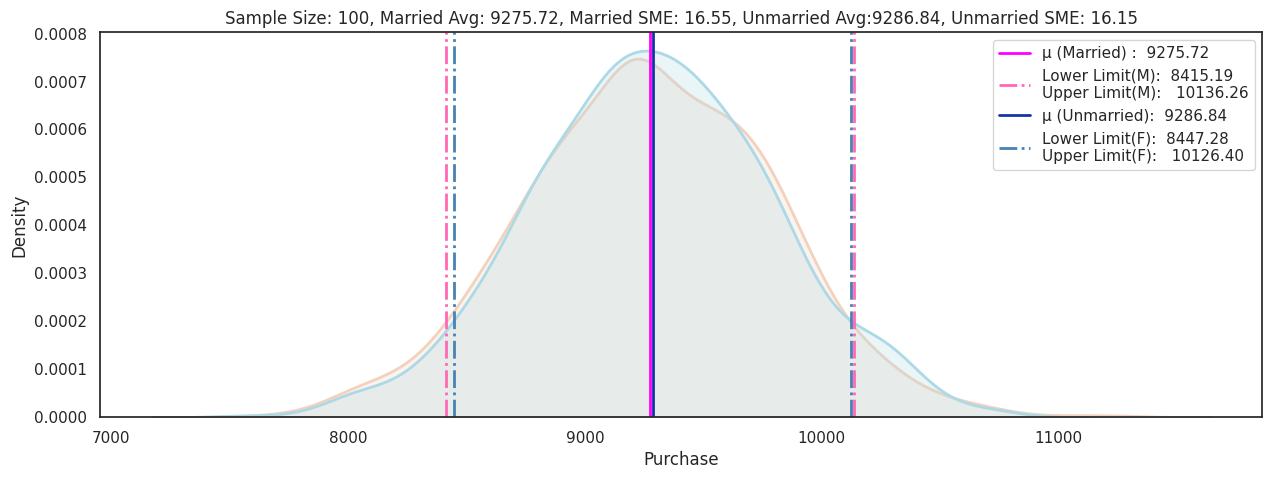

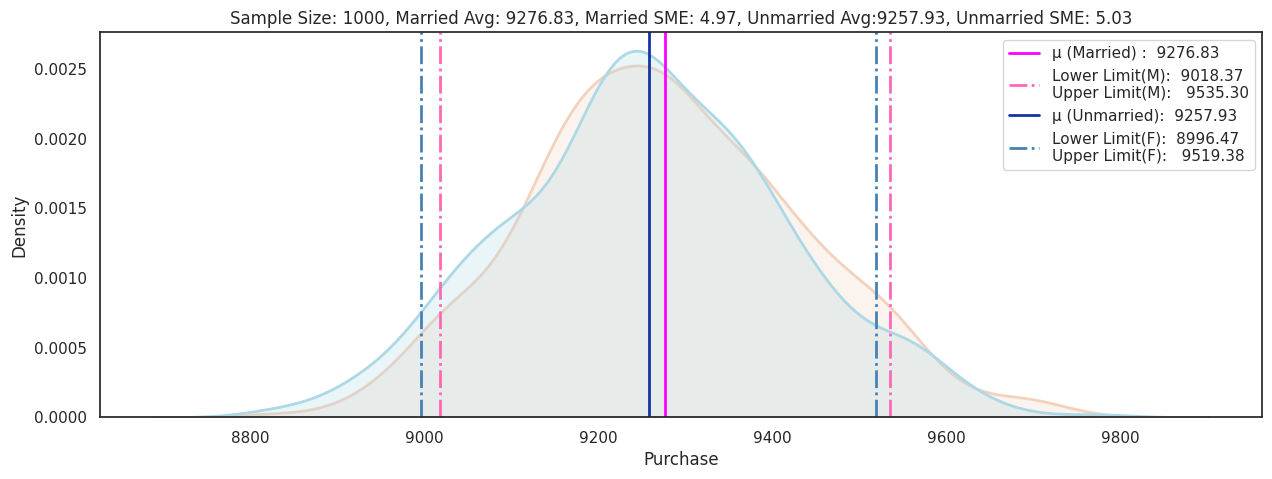

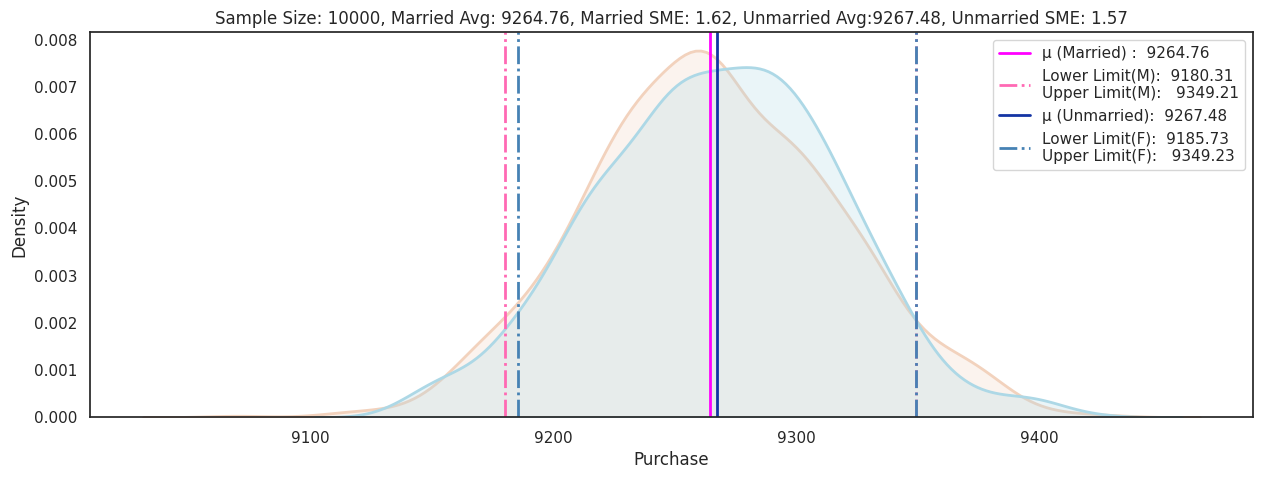

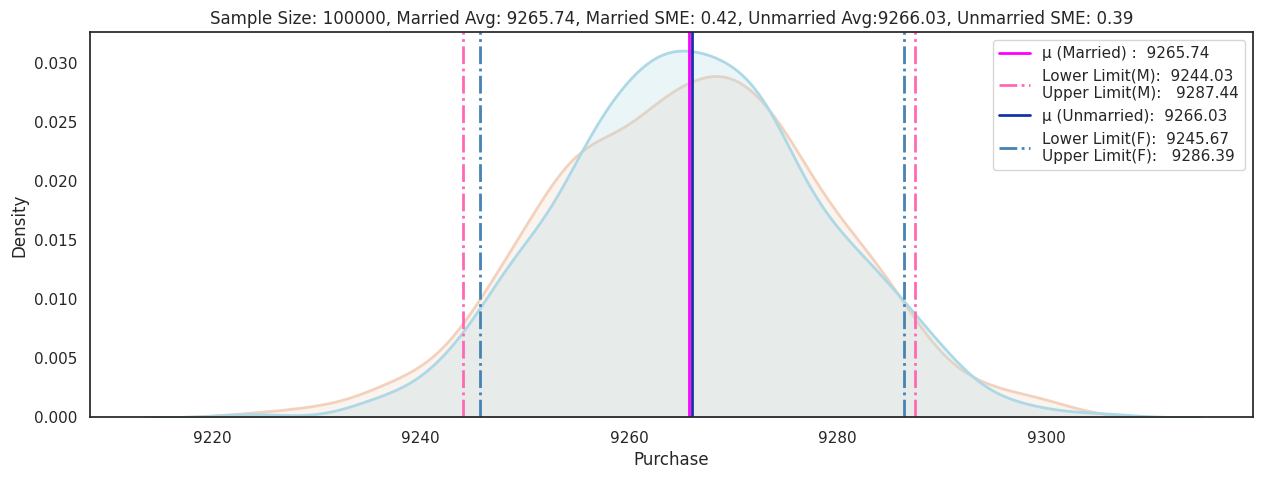

In [ ]:
# Mean of 1000 random samples of sizes 10,100,1000,10000 and 100000 with 90% Confidence Interval
sample_sizes = [10,100,1000,10000,100000]
ci = 90
itr_size = 1000

res_marital_status = pd.DataFrame(columns = ['Marital_Status','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in sample_sizes:
    m_avg, un_avg, ll_m, ul_m, ll_un, ul_un = bootstrap_marital_status(df_married['Purchase'],df_married['Purchase'],i,itr_size,ci)

    res_marital_status = res_marital_status.append({'Marital_Status':'Married','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    res_marital_status = res_marital_status.append({'Marital_Status':'Unmarried','Sample Size':i,'Lower Limit':ll_un,'Upper Limit':ul_un,'Sample Mean':un_avg,'Confidence Interval':ci,'Interval Range':[ll_un,ul_un],'Range': ul_un-ll_un}, ignore_index = True)

**Observations:**

- As the sample size increases, the overlapping is still there. So, there is no effect of marital status on the purchase habits of customers.

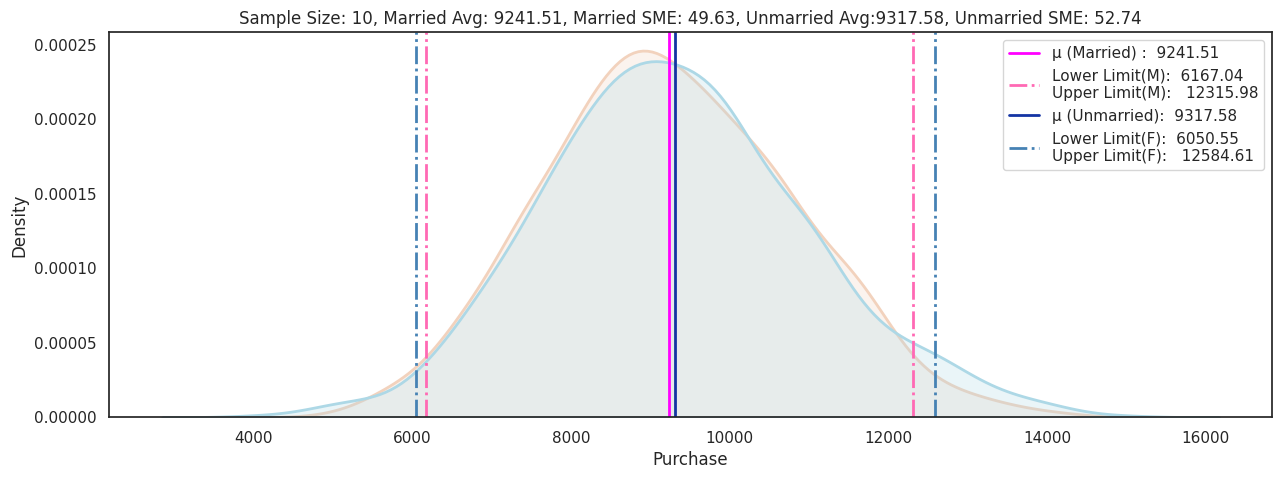

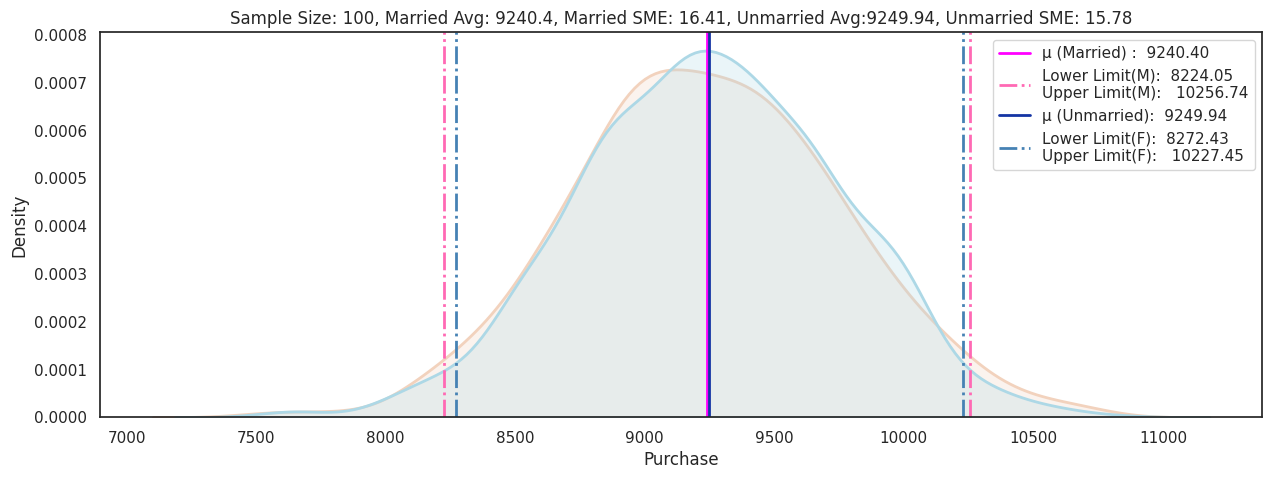

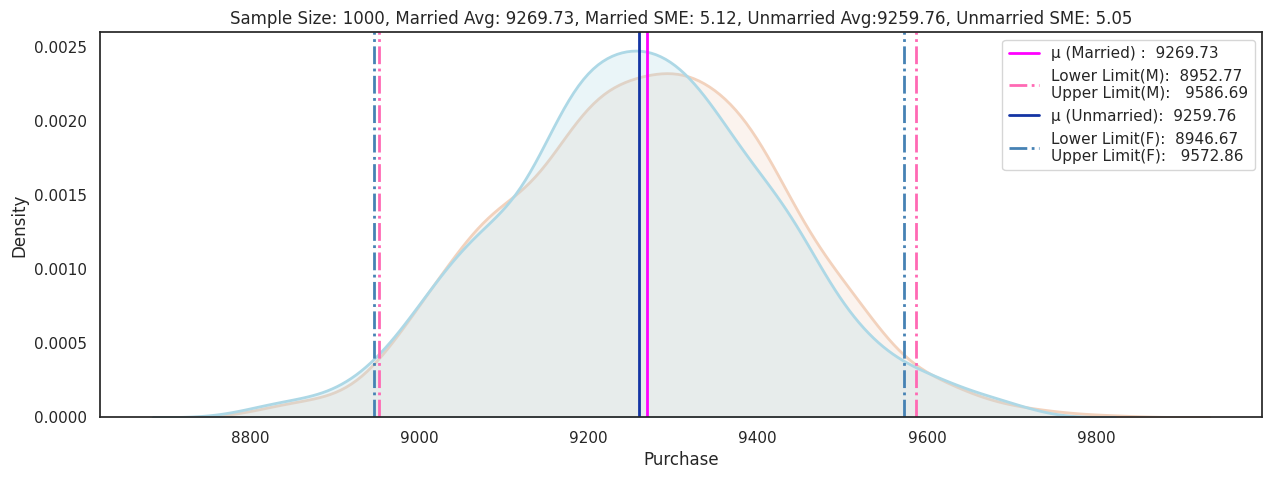

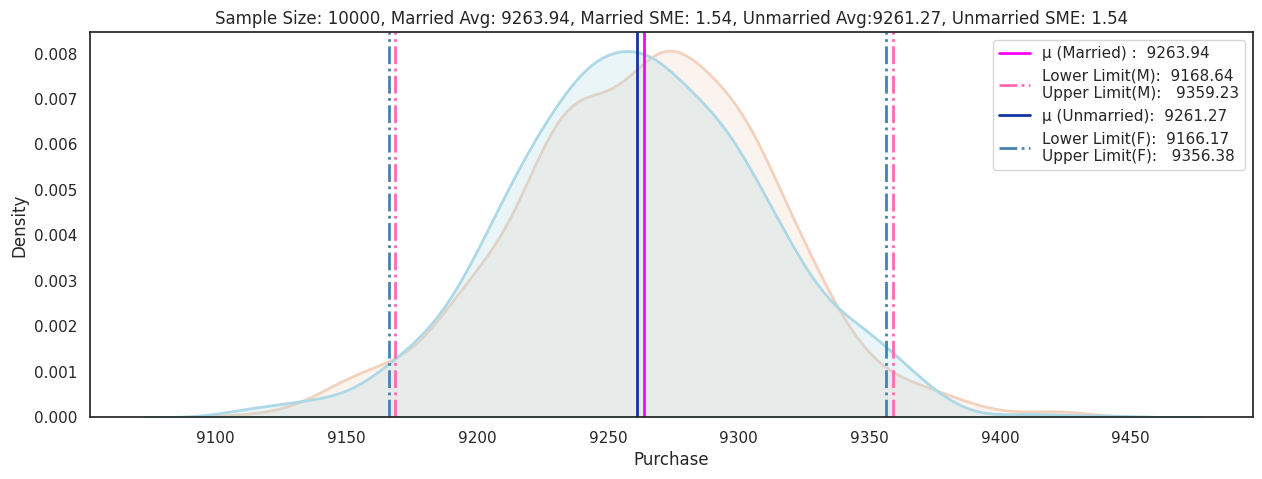

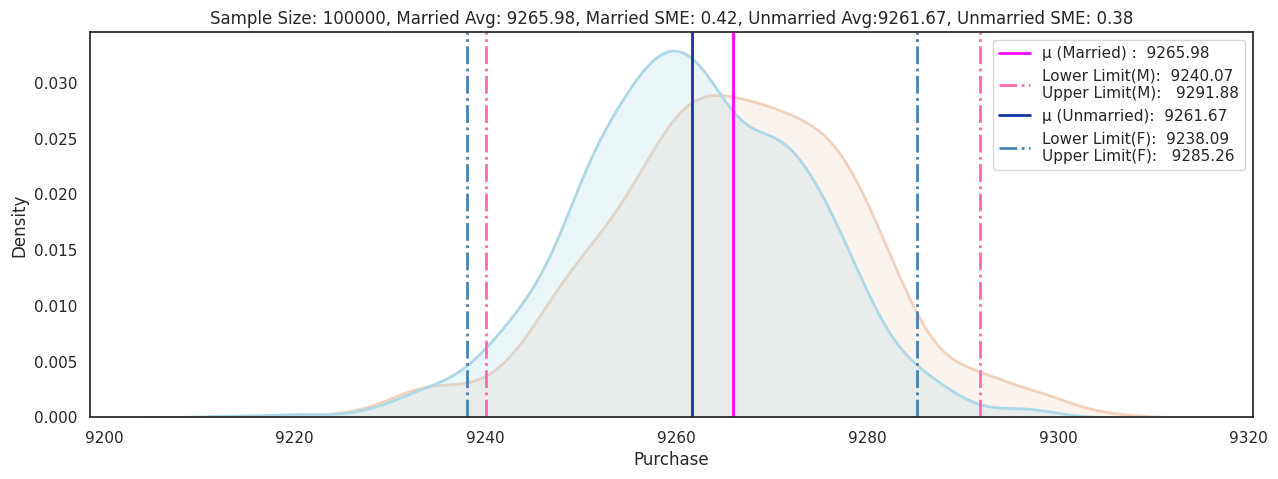

In [ ]:
# Mean of 1000 random samples of sizes 10,100,1000,10000 and 100000 with 95% Confidence Interval
sample_sizes = [10,100,1000,10000,100000]
ci = 95
itr_size = 1000

for i in sample_sizes:
    m_avg, un_avg, ll_m, ul_m, ll_un, ul_un = bootstrap_marital_status(df_married['Purchase'],df_unmarried['Purchase'],i,itr_size,ci)

    res_marital_status = res_marital_status.append({'Marital_Status':'Married','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    res_marital_status = res_marital_status.append({'Marital_Status':'Unmarried','Sample Size':i,'Lower Limit':ll_un,'Upper Limit':ul_un,'Sample Mean':un_avg,'Confidence Interval':ci,'Interval Range':[ll_un,ul_un],'Range': ul_un-ll_un}, ignore_index = True)

**Observations:**

- As the sample size increases, the overlapping is still there. So, there is no effect of marital status on the purchase habits of customers.

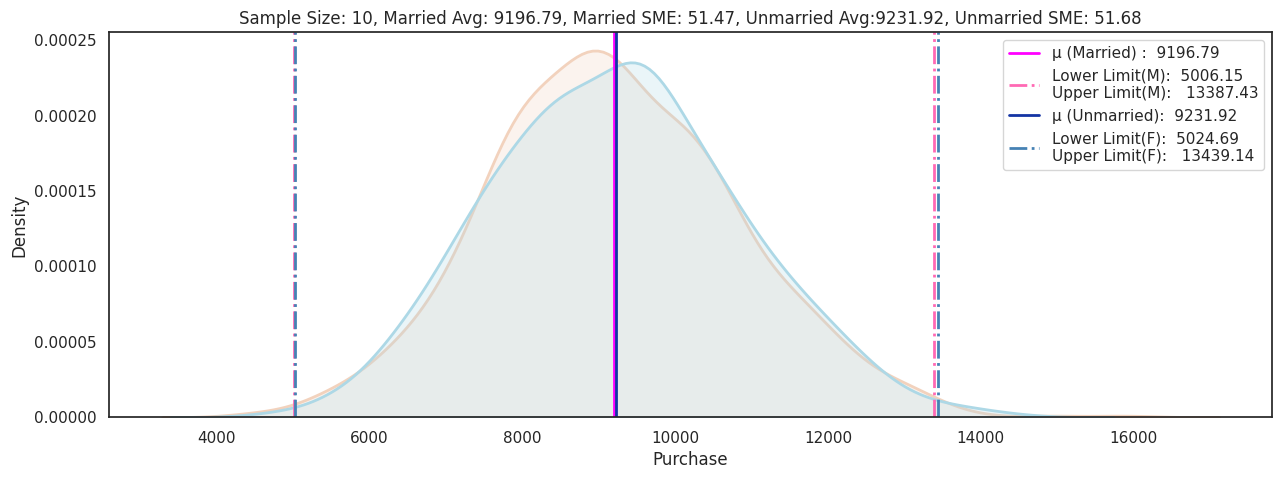

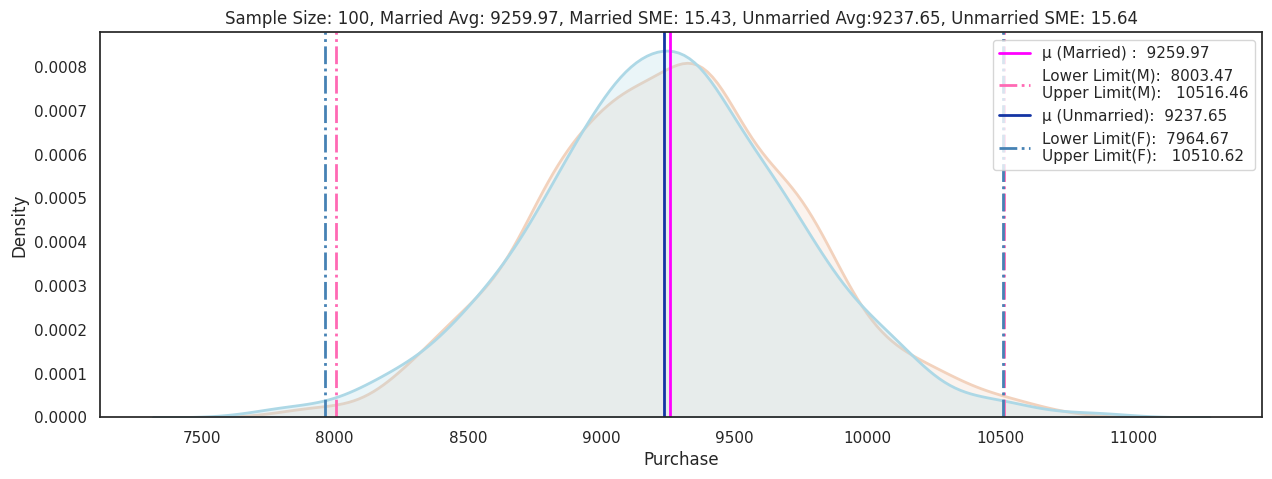

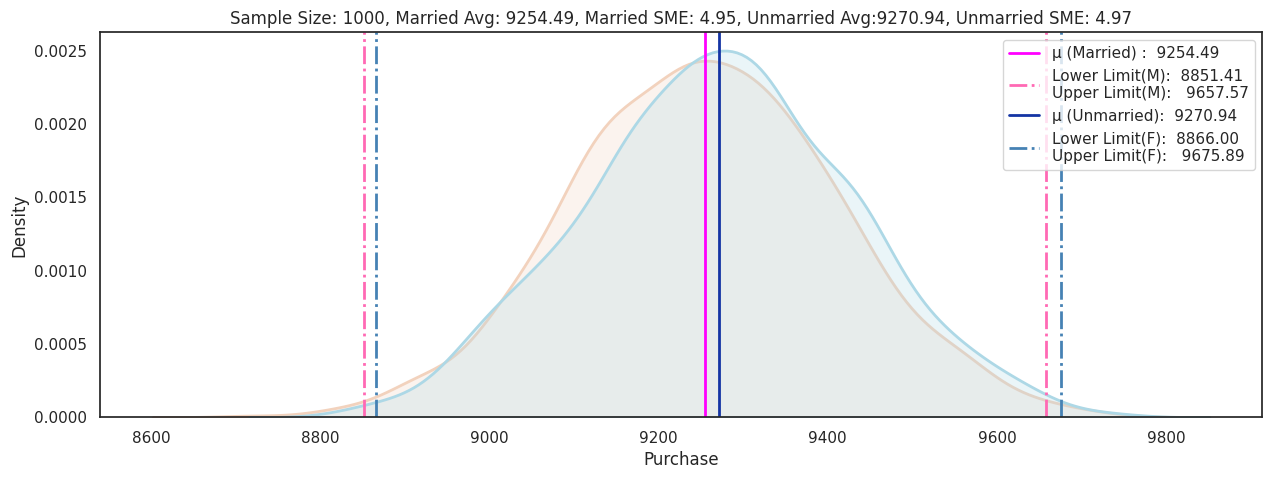

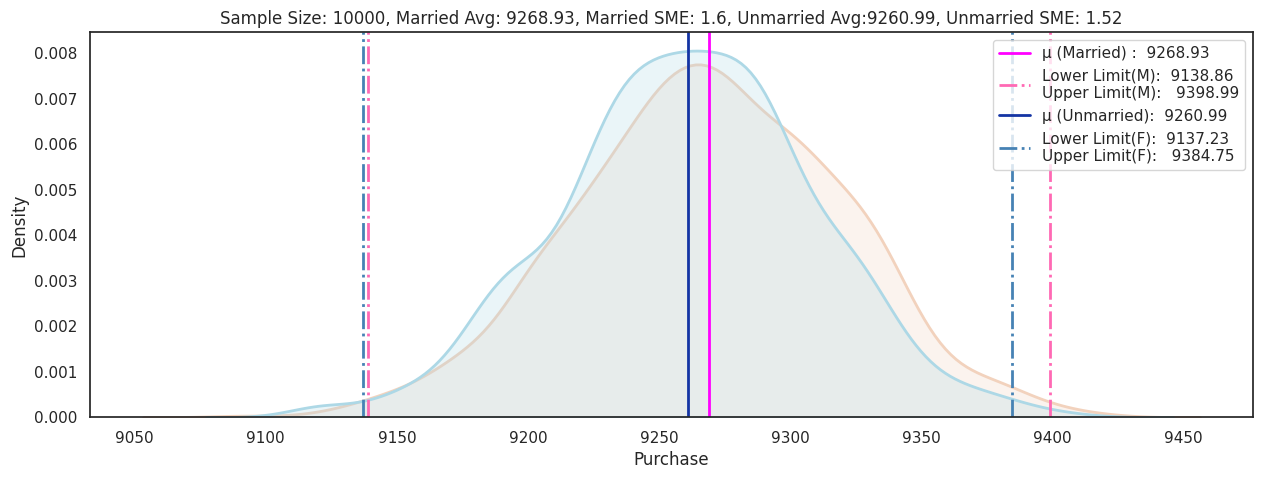

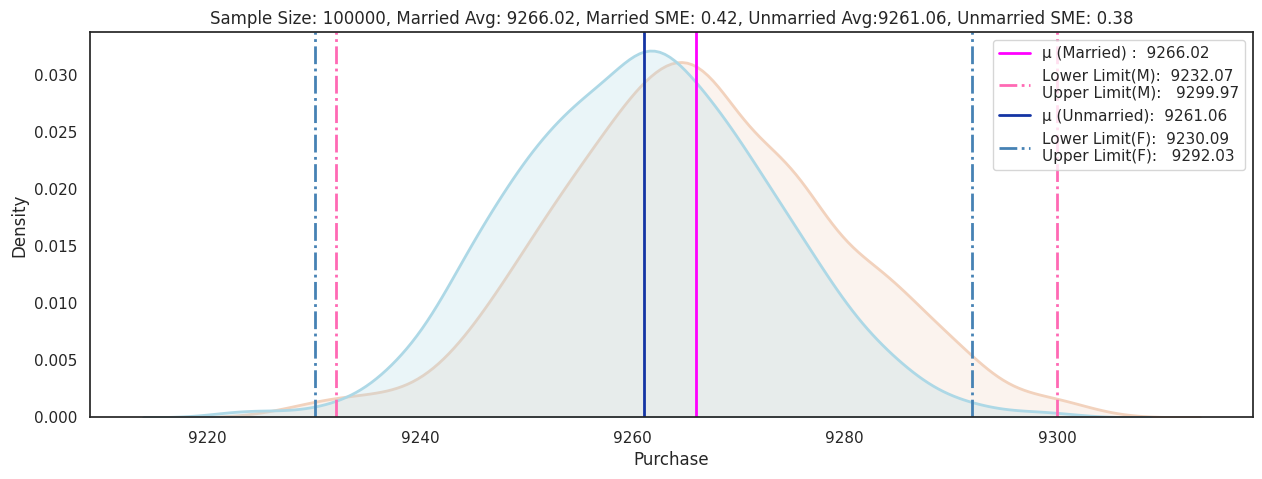

In [ ]:
# Mean of 1000 random samples of sizes 10,100,1000,10000 and 100000 with 99% Confidence Interval
sample_sizes = [10,100,1000,10000,100000]
ci = 99
itr_size = 1000

for i in sample_sizes:
    m_avg, un_avg, ll_m, ul_m, ll_un, ul_un = bootstrap_marital_status(df_married['Purchase'],df_unmarried['Purchase'],i,itr_size,ci)

    res_marital_status = res_marital_status.append({'Marital_Status':'Married','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    res_marital_status = res_marital_status.append({'Marital_Status':'Unmarried','Sample Size':i,'Lower Limit':ll_un,'Upper Limit':ul_un,'Sample Mean':un_avg,'Confidence Interval':ci,'Interval Range':[ll_un,ul_un],'Range': ul_un-ll_un}, ignore_index = True)

**Observations:**

- As the sample size increases, the overlapping is still there. So, there is no effect of marital status on the purchase habits of customers.

In [ ]:
res_marital_status

Marital_Status Sample Size  Lower Limit  Upper Limit  Sample Mean  \
0         Married          10      6692.66     11826.26      9259.46   
1       Unmarried          10      6733.71     11960.65      9347.18   
2         Married         100      8415.19     10136.26      9275.72   
3       Unmarried         100      8447.28     10126.40      9286.84   
4         Married        1000      9018.37      9535.30      9276.83   
5       Unmarried        1000      8996.47      9519.38      9257.93   
6         Married       10000      9180.31      9349.21      9264.76   
7       Unmarried       10000      9185.73      9349.23      9267.48   
8         Married      100000      9244.03      9287.44      9265.74   
9       Unmarried      100000      9245.67      9286.39      9266.03   
10        Married          10      6167.04     12315.98      9241.51   
11      Unmarried          10      6050.55     12584.61      9317.58   
12        Married         100      8224.05     10256.74      9240.40   
13      Unmarried         100      8272.43     10227.45      9249.94   
14        Married        1000      8952.77      9586.69      9269.73   
15      Unmarried        1000      8946.67      9572.86      9259.76   
16        Married       10000      9168.64      9359.23      9263.94   
17      Unmarried       10000      9166.17      9356.38      9261.27   
18        Married      100000      9240.07      9291.88      9265.98   
19      Unmarried      100000      9238.09      9285.26      9261.67   
20        Married          10      5006.15     13387.43      9196.79   
21      Unmarried          10      5024.69     13439.14      9231.92   
22        Married         100      8003.47     10516.46      9259.97   
23      Unmarried         100      7964.67     10510.62      9237.65   
24        Married        1000      8851.41      9657.57      9254.49   
25      Unmarried        1000      8866.00      9675.89      9270.94   
26        Married       10000      9138.86      9398.99      9268.93   
27      Unmarried       10000      9137.23      9384.75      9260.99   
28        Married      100000      9232.07      9299.97      9266.02   
29      Unmarried      100000      9230.09      9292.03      9261.06   

   Confidence Interval       Interval Range    Range  
0                   90  [6692.66, 11826.26]  5133.60  
1                   90  [6733.71, 11960.65]  5226.94  
2                   90  [8415.19, 10136.26]  1721.07  
3                   90   [8447.28, 10126.4]  1679.12  
4                   90    [9018.37, 9535.3]   516.93  
5                   90   [8996.47, 9519.38]   522.91  
6                   90   [9180.31, 9349.21]   168.90  
7                   90   [9185.73, 9349.23]   163.50  
8                   90   [9244.03, 9287.44]    43.41  
9                   90   [9245.67, 9286.39]    40.72  
10                  95  [6167.04, 12315.98]  6148.94  
11                  95  [6050.55, 12584.61]  6534.06  
12                  95  [8224.05, 10256.74]  2032.69  
13                  95  [8272.43, 10227.45]  1955.02  
14                  95   [8952.77, 9586.69]   633.92  
15                  95   [8946.67, 9572.86]   626.19  
16                  95   [9168.64, 9359.23]   190.59  
17                  95   [9166.17, 9356.38]   190.21  
18                  95   [9240.07, 9291.88]    51.81  
19                  95   [9238.09, 9285.26]    47.17  
20                  99  [5006.15, 13387.43]  8381.28  
21                  99  [5024.69, 13439.14]  8414.45  
22                  99  [8003.47, 10516.46]  2512.99  
23                  99  [7964.67, 10510.62]  2545.95  
24                  99   [8851.41, 9657.57]   806.16  
25                  99    [8866.0, 9675.89]   809.89  
26                  99   [9138.86, 9398.99]   260.13  
27                  99   [9137.23, 9384.75]   247.52  
28                  99   [9232.07, 9299.97]    67.90  
29                  99   [9230.09, 9292.03]    61.94

### Results when the same activity is performed for Age

<Figure size 1500x500 with 0 Axes>

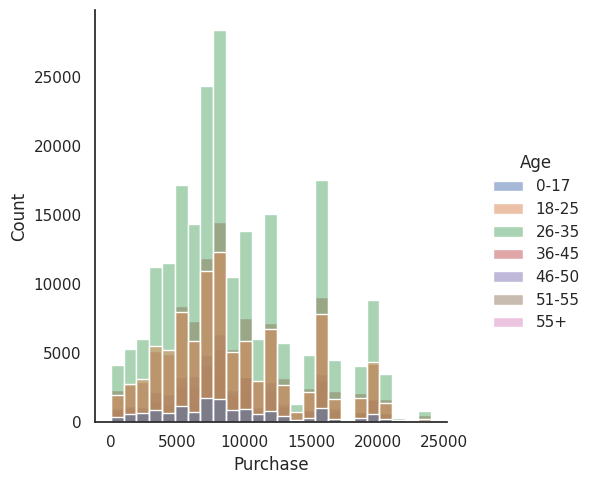

In [ ]:
plt.figure(figsize=(15,5))
sns.displot(x= 'Purchase',data=df,hue='Age',bins=25)
plt.show()

In [ ]:
df.groupby(['Age'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

There is not much difference in the median purchase values for different age groups. Age group 51-55 has the highest average purchase amount which is around 9534, while age group 0-17 has the least average purchase amount which is around 8933.

#### Confidence intervals and distribution of the mean of the expenses by different age groups

In [ ]:
# Central Limit Theorem
def bootstrap_age(sample, sample_size, itr_size=1000, ci = 90):
    ci = ci/100

    global flag

    sample_n = [np.mean(sample.sample(sample_size)) for i in range(itr_size)]

    mean  = np.mean(sample_n)
    sigma = np.std(sample_n)
    sem   = stats.sem(sample_n)

    lower_limit = norm.ppf((1-ci)/2) * sigma + mean
    upper_limit = norm.ppf(ci + (1-ci)/2) * sigma + mean

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=sample_n,color="#7A68A6",fill=True,linewidth=2)

    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))

    plt.title(f"Age Group: {age_group[flag]}, Sample Size: {sample_size}, Mean:{np.round(mean,2)}, SME:{np.round(sem,2)}",fontsize=14,family="Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'dotted', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'dotted', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    flag += 1

    return sample_n ,np.round(lower_limit,2),np.round(upper_limit,2), round(mean,2)

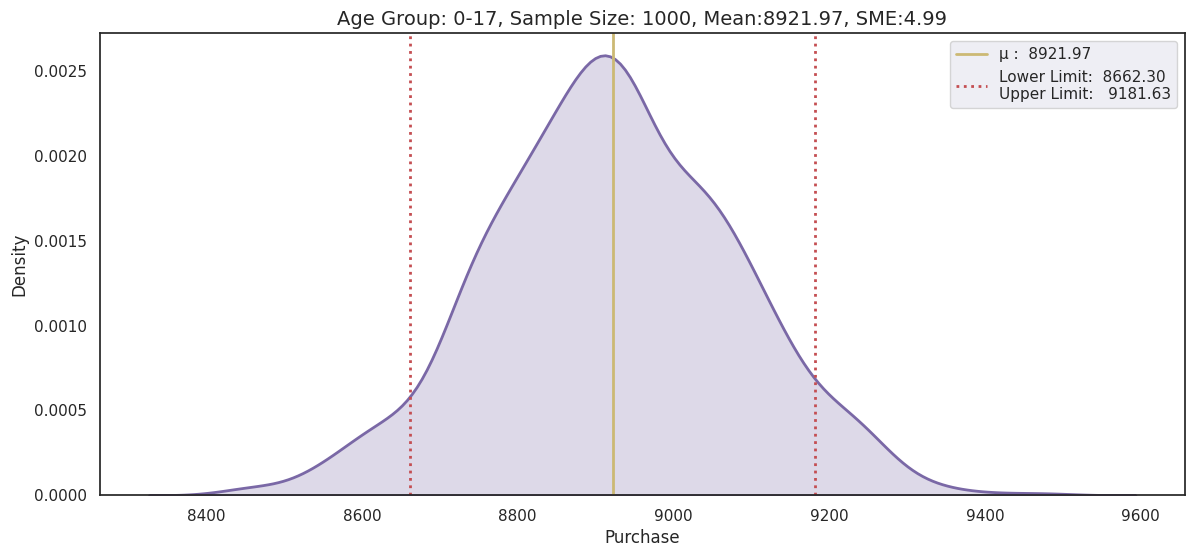

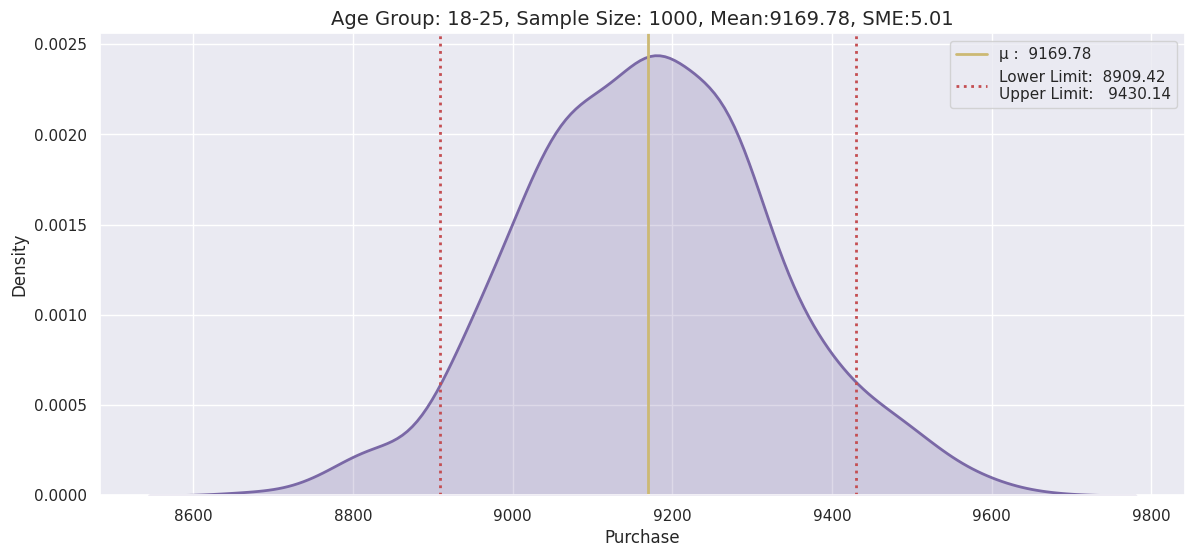

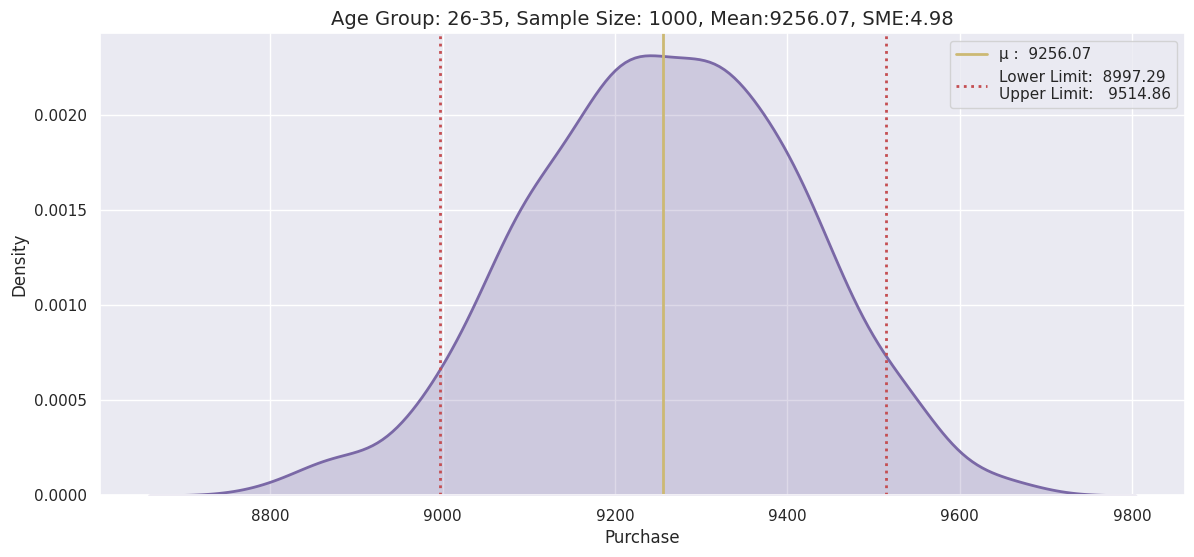

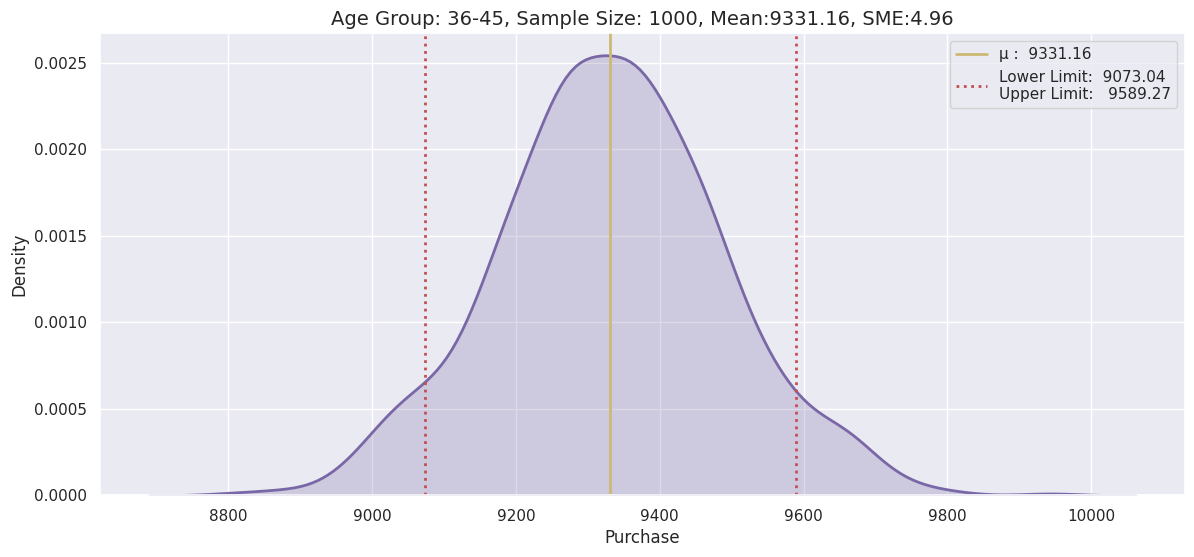

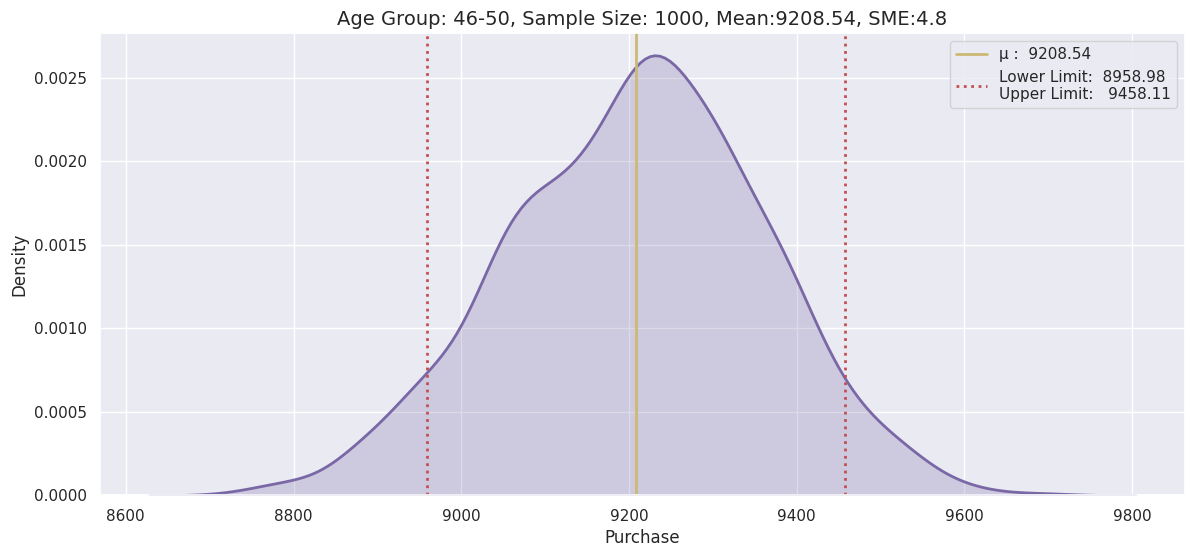

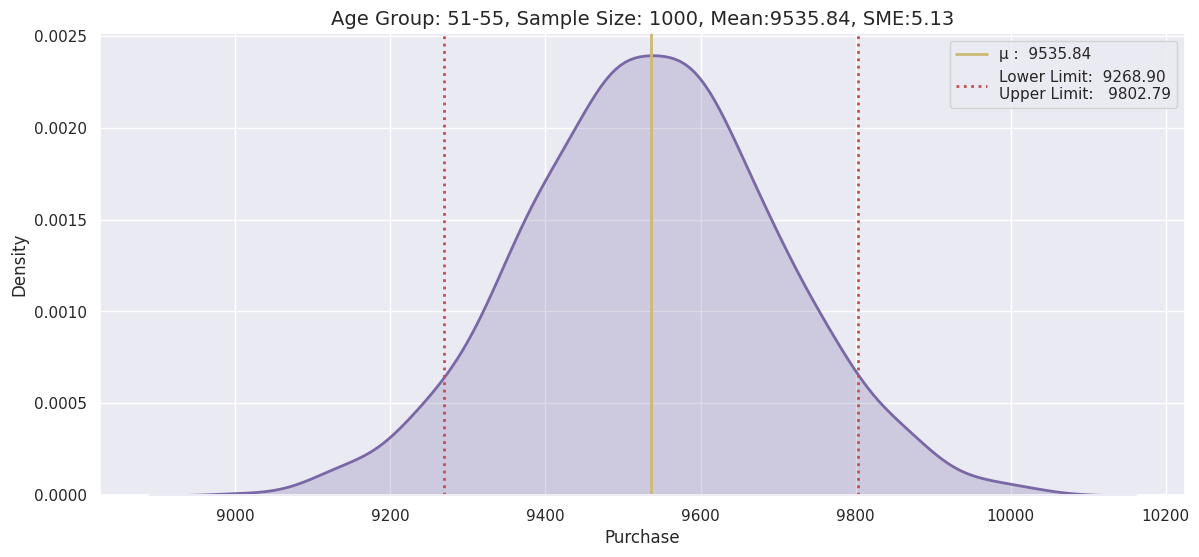

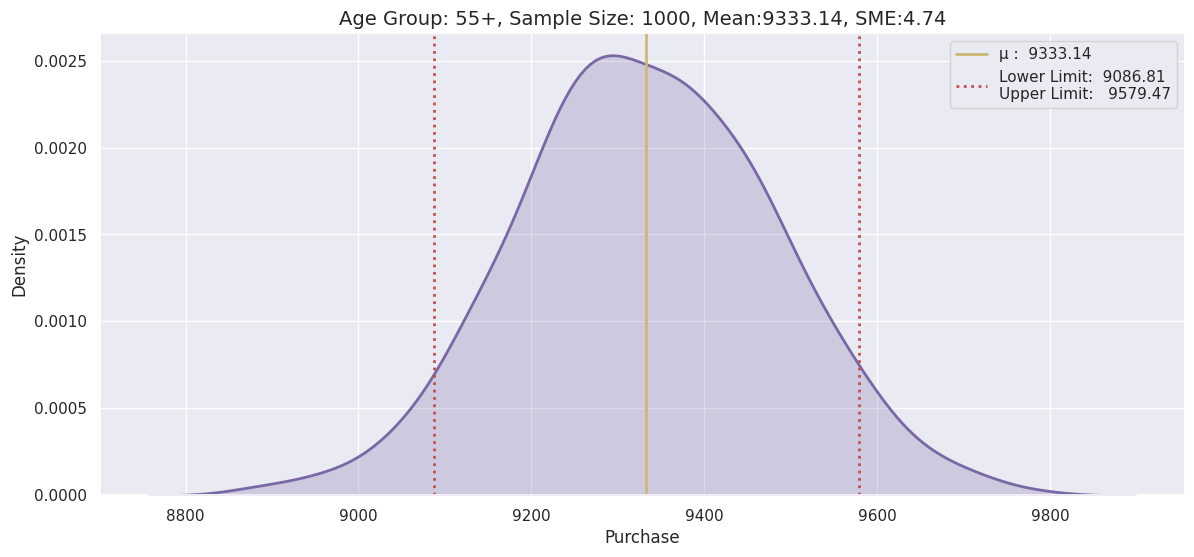

In [ ]:
# Mean of 1000 random samples of sizes 10,100,1000,10000 and 100000 with 90% Confidence Interval
ci = 90
itr_size = 1000
sample_size = 1000
flag = 0
global age_group
age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

res_age = pd.DataFrame(columns = ['Age_Group','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in age_group:
    m_avg, ll, ul, mean = bootstrap_age(df[df['Age']==i]['Purchase'],sample_size,itr_size,ci)

    res_age = res_age.append({'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}, ignore_index = True)

**Observations:**

- With 90% confidence we can say that age group 0-17 has the least purchase value range of [8696.64, 9192.78], while age group 51-55 has highest purchase value range of [9289.04, 9798.65].

- Age group does not have much effect on the spending of customers as their interval range is overalpping with 90% confidence interval.

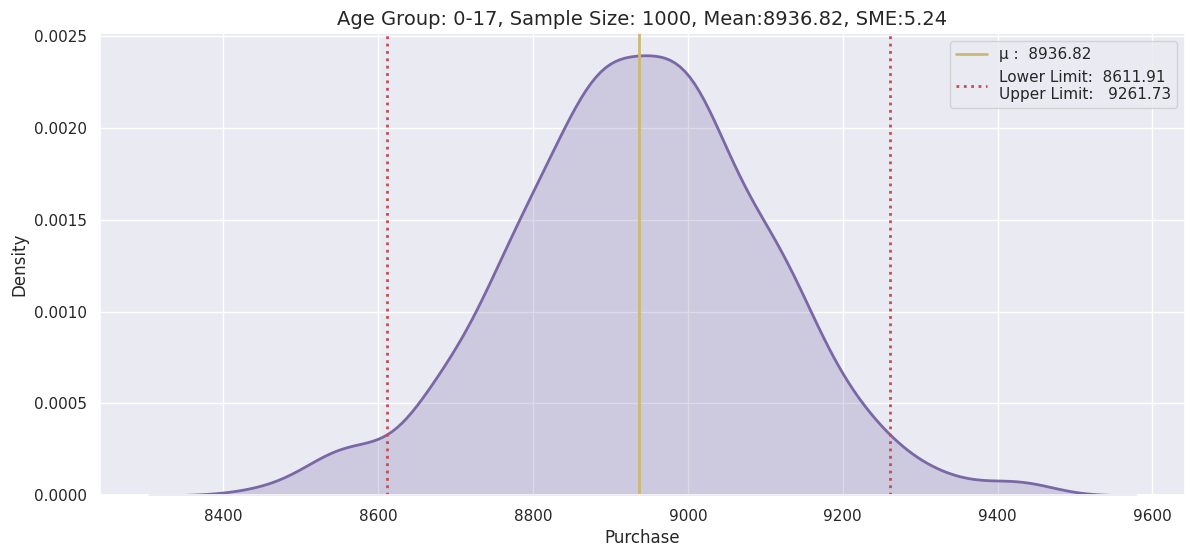

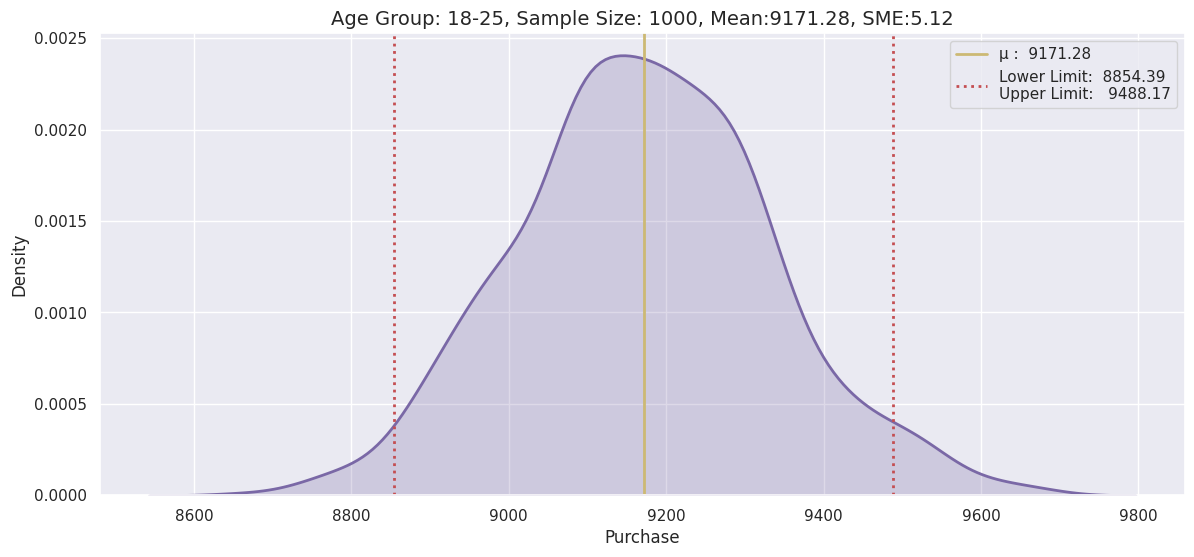

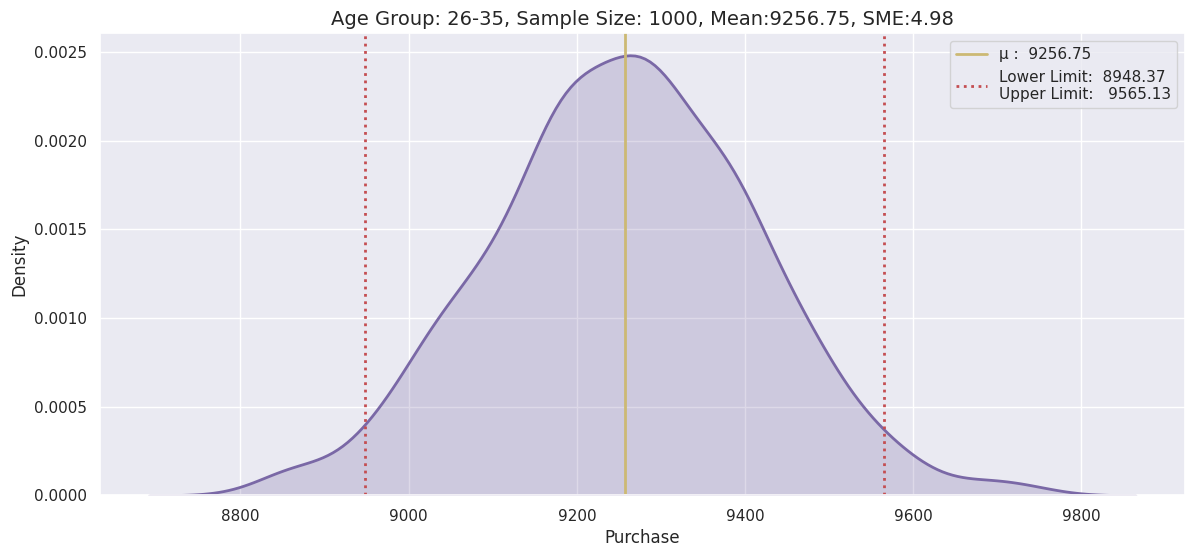

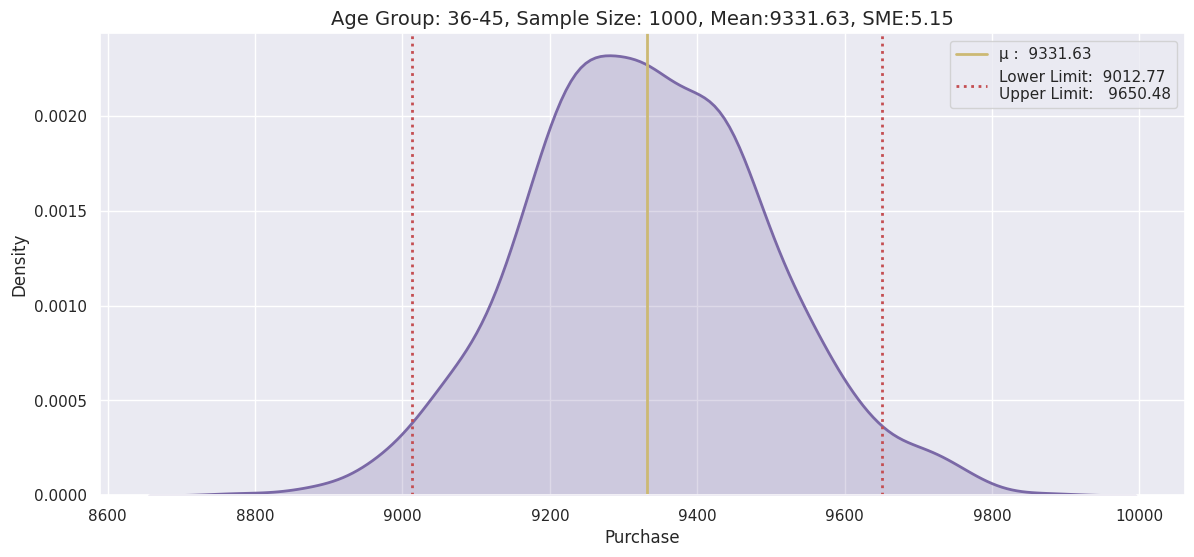

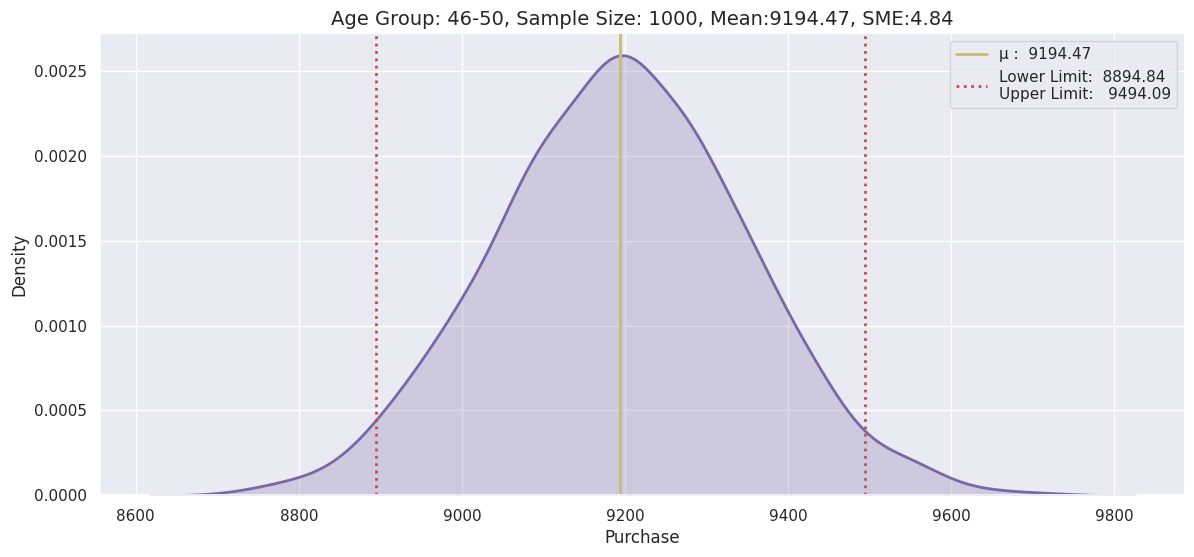

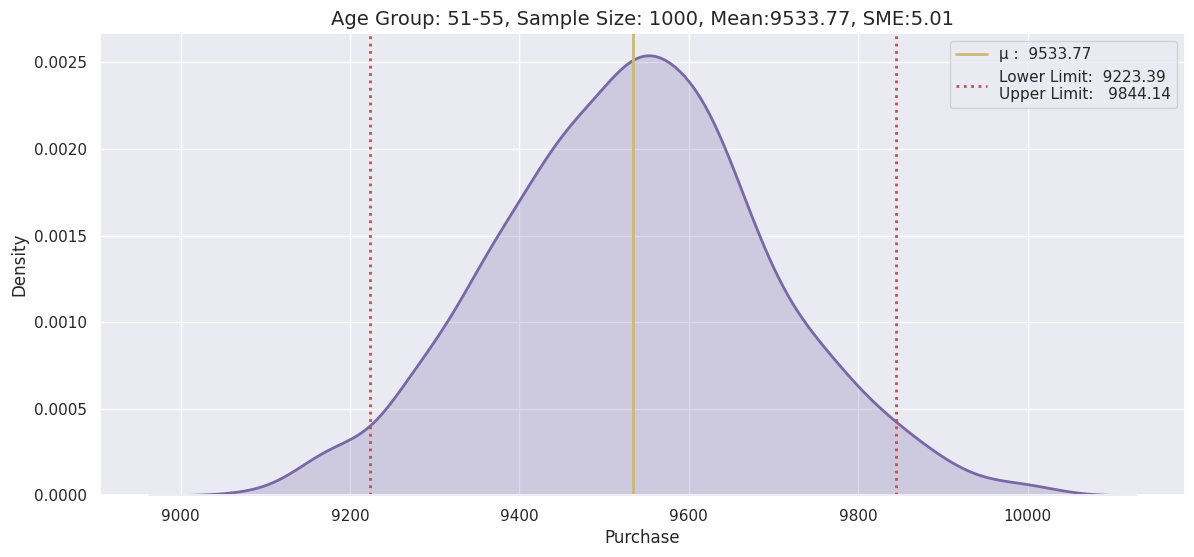

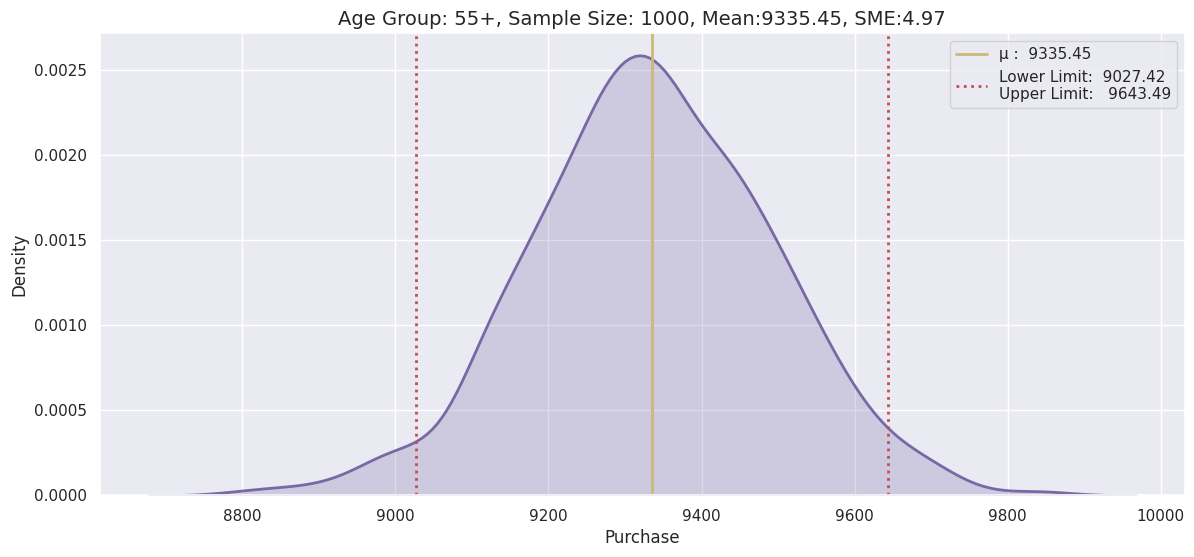

In [ ]:
# Mean of 1000 random samples of sizes 10,100,1000,10000 and 100000 with 95% Confidence Interval
ci = 95
itr_size = 1000
sample_size = 1000
flag = 0
global age_group
age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

for i in age_group:
    m_avg, ll, ul, mean = bootstrap_age(df[df['Age']==i]['Purchase'],sample_size,itr_size,ci)

    res_age = res_age.append({'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}, ignore_index = True)

**Observations:**

- With 95% confidence we can say that age group 0-17 has the least purchase value range of [8634.91, 9228.71], while age group 51-55 has highest purchase value range of [9211.89, 9854.65].

- Age group does not have much effect on the spending of customers as their interval range is overalpping with 95% confidence interval.

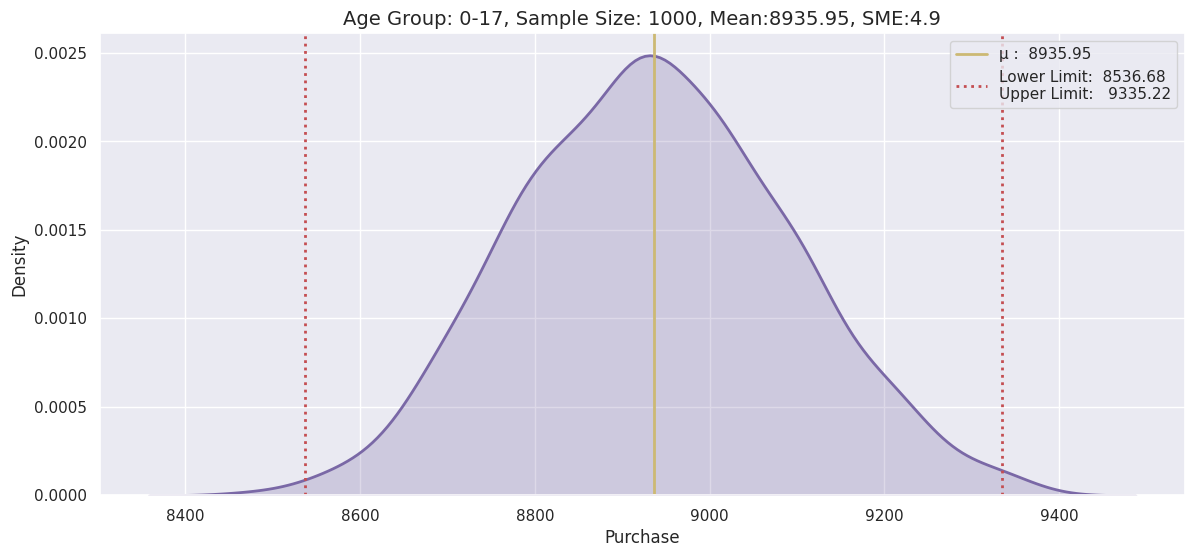

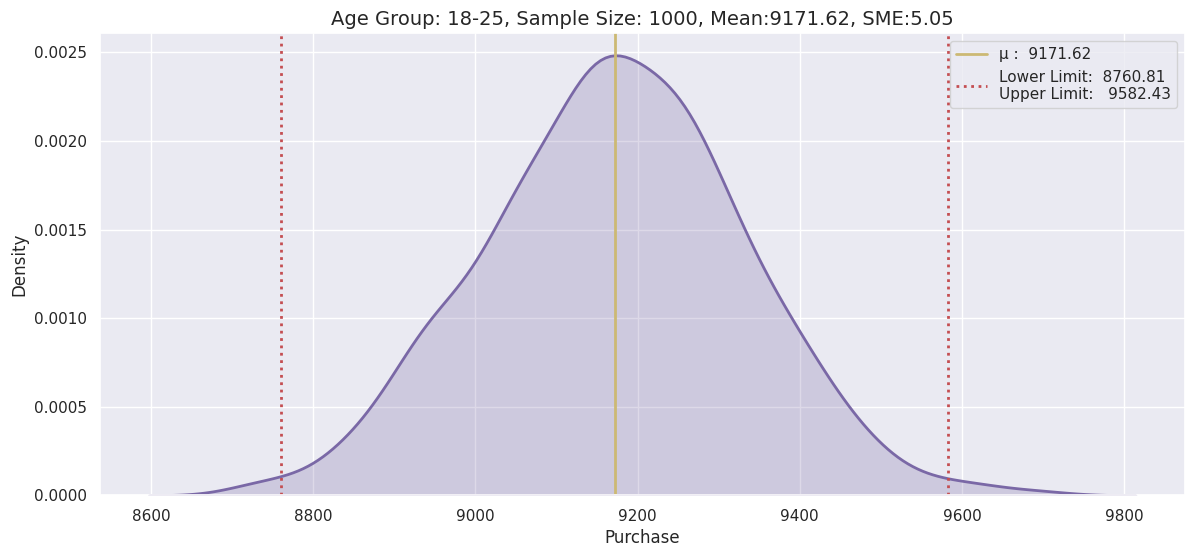

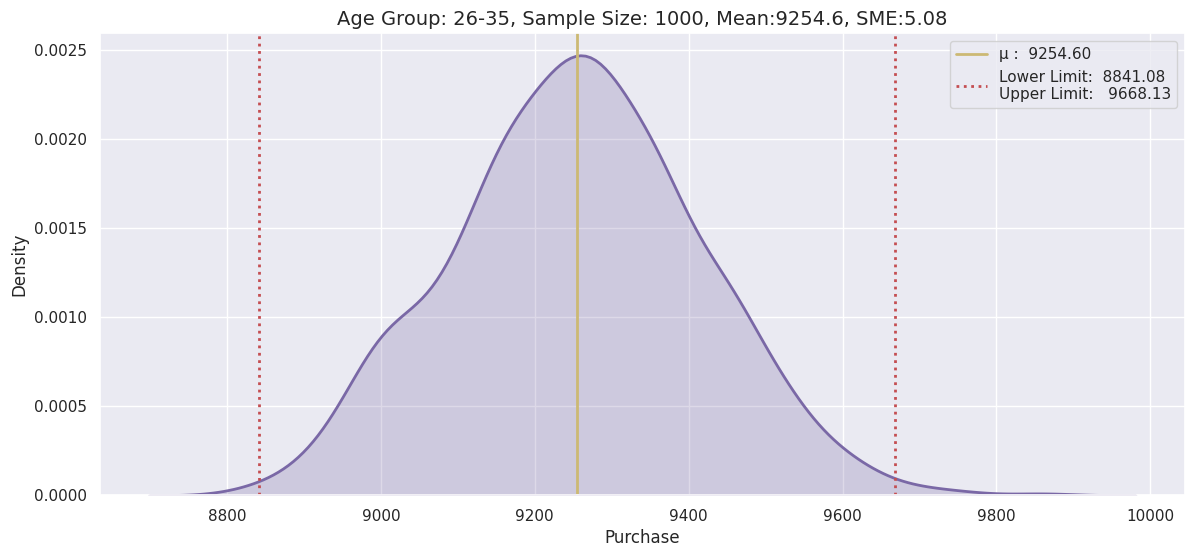

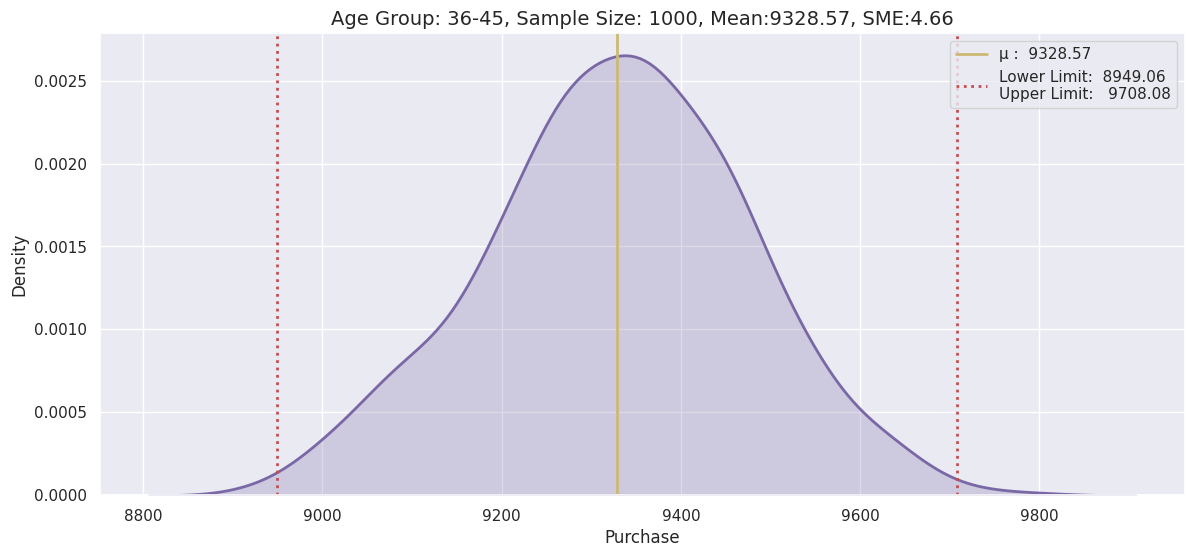

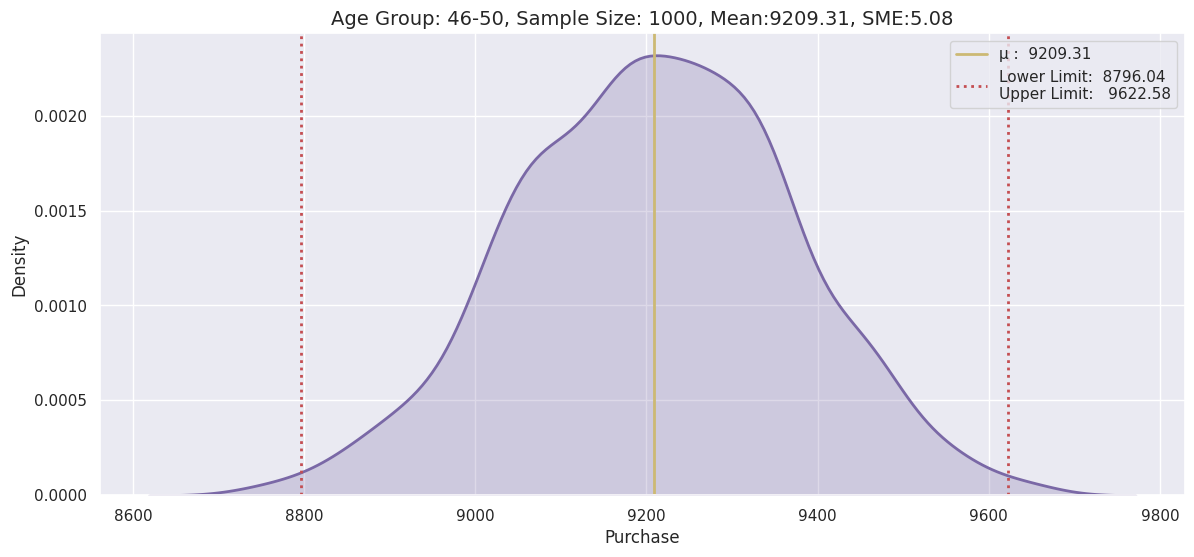

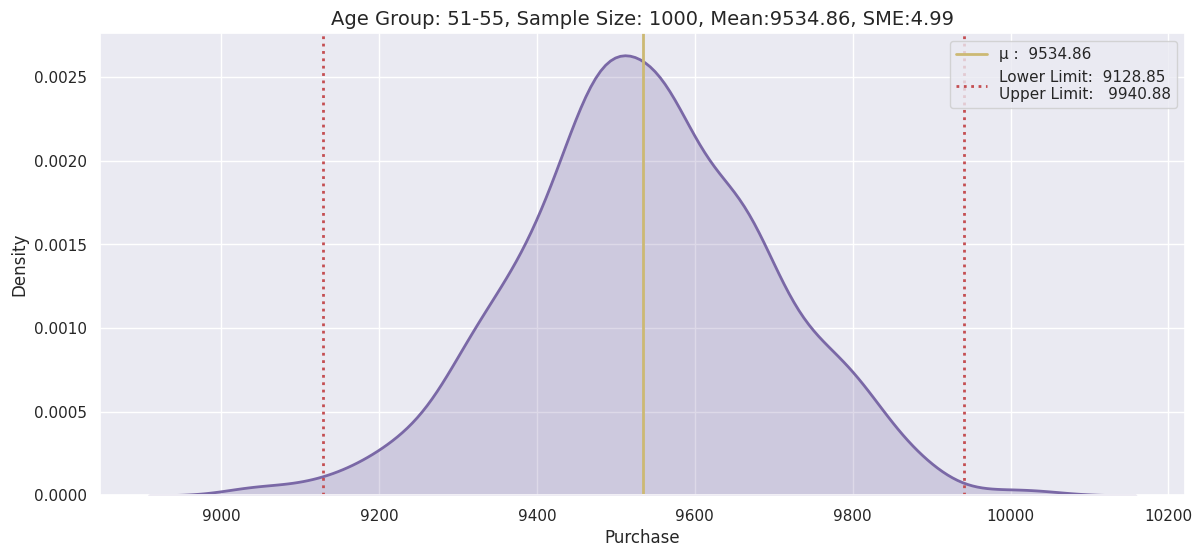

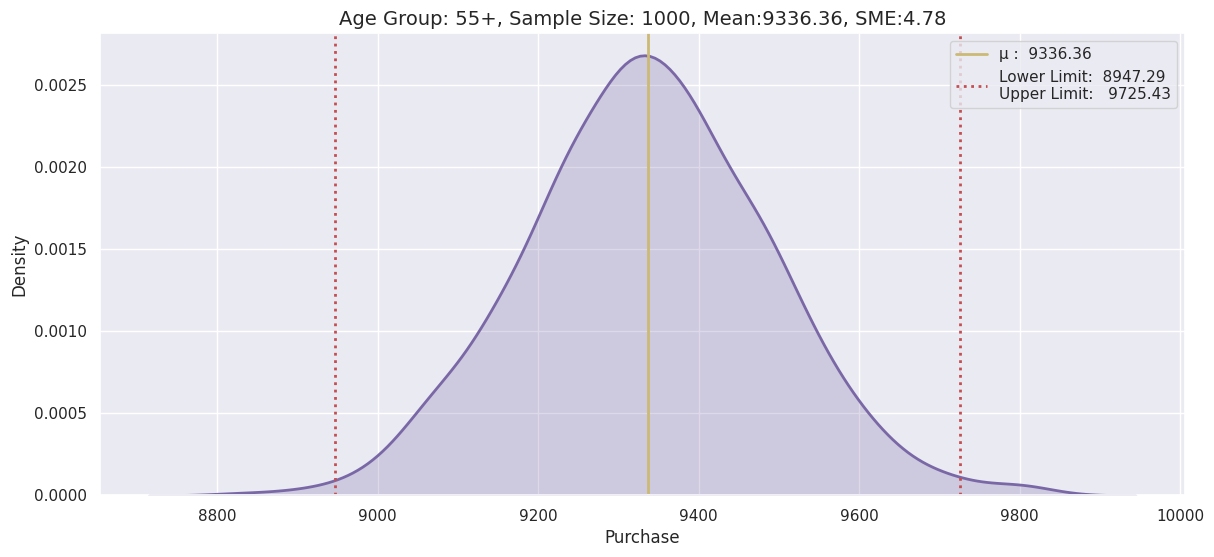

In [ ]:
# Mean of 1000 random samples of sizes 10,100,1000,10000 and 100000 with 99% Confidence Interval
ci = 99
itr_size = 1000
sample_size = 1000
flag = 0
global age_group
age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

for i in age_group:
    m_avg, ll, ul, mean = bootstrap_age(df[df['Age']==i]['Purchase'],sample_size,itr_size,ci)

    res_age = res_age.append({'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}, ignore_index = True)

**Observations:**

- With 99% confidence we can say that age group 0-17 has the least purchase value range of [8503.28, 9362.82], while age group 51-55 has highest purchase value range of [9122.07, 9948.79].

- Age group does not have much effect on the spending of customers as their interval range is overalpping with 99% confidence interval.

In [ ]:
res_age

Age_Group Sample Size  Lower Limit  Upper Limit  Sample Mean  \
0       0-17        1000      8662.30      9181.63      8921.97   
1      18-25        1000      8909.42      9430.14      9169.78   
2      26-35        1000      8997.29      9514.86      9256.07   
3      36-45        1000      9073.04      9589.27      9331.16   
4      46-50        1000      8958.98      9458.11      9208.54   
5      51-55        1000      9268.90      9802.79      9535.84   
6        55+        1000      9086.81      9579.47      9333.14   
7       0-17        1000      8611.91      9261.73      8936.82   
8      18-25        1000      8854.39      9488.17      9171.28   
9      26-35        1000      8948.37      9565.13      9256.75   
10     36-45        1000      9012.77      9650.48      9331.63   
11     46-50        1000      8894.84      9494.09      9194.47   
12     51-55        1000      9223.39      9844.14      9533.77   
13       55+        1000      9027.42      9643.49      9335.45   
14      0-17        1000      8536.68      9335.22      8935.95   
15     18-25        1000      8760.81      9582.43      9171.62   
16     26-35        1000      8841.08      9668.13      9254.60   
17     36-45        1000      8949.06      9708.08      9328.57   
18     46-50        1000      8796.04      9622.58      9209.31   
19     51-55        1000      9128.85      9940.88      9534.86   
20       55+        1000      8947.29      9725.43      9336.36   

   Confidence Interval      Interval Range   Range  
0                   90   [8662.3, 9181.63]  519.33  
1                   90  [8909.42, 9430.14]  520.72  
2                   90  [8997.29, 9514.86]  517.57  
3                   90  [9073.04, 9589.27]  516.23  
4                   90  [8958.98, 9458.11]  499.13  
5                   90   [9268.9, 9802.79]  533.89  
6                   90  [9086.81, 9579.47]  492.66  
7                   95  [8611.91, 9261.73]  649.82  
8                   95  [8854.39, 9488.17]  633.78  
9                   95  [8948.37, 9565.13]  616.76  
10                  95  [9012.77, 9650.48]  637.71  
11                  95  [8894.84, 9494.09]  599.25  
12                  95  [9223.39, 9844.14]  620.75  
13                  95  [9027.42, 9643.49]  616.07  
14                  99  [8536.68, 9335.22]  798.54  
15                  99  [8760.81, 9582.43]  821.62  
16                  99  [8841.08, 9668.13]  827.05  
17                  99  [8949.06, 9708.08]  759.02  
18                  99  [8796.04, 9622.58]  826.54  
19                  99  [9128.85, 9940.88]  812.03  
20                  99  [8947.29, 9725.43]  778.14

**Inferences**
- 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)

- 75% of the users are Male and 25% are Female. Males clearly purchase more than females.

- 59% Single, 41% Married

- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years

- The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.

- The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.

- Majority of Customers purchase within the 5,000 - 20,000 range.

- Most mall customers are between the ages of 26 and 35.60% of purchases are made by people between the ages of 26 and 45

- City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.Purchases are high in city category C

- Most mall customers are between the ages of 26 and 35. City category C has more customers between the ages of 18 and 45.

- In City Category C, there are slightly more female customers.

- Product 5 and 8 is common among females.

**Recommendations**
- Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.

- Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on * selling more of these products or selling more of the products which are purchased less.

- Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

- Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45.

- Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

- In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

- Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.

- The management should have some offers on kids (0-17 years) in order to increase sales.

- In order to attract more young shoppers, they can offer some games for the younger generation.